descargamos el archivo desde el link de google drive proporcionado

In [470]:

from wget import download
from os import path, listdir

if not path.exists("Calidad_de_agua_2022.csv"):
    download("https://drive.google.com/uc?export=download&id=1aT6PJDaXfBu8-tZljO6dK4LZ51Bm29vk")
else:
  print("No vamos a bajar el archivo de agua ya que ya se encuentra en el directorio")



No vamos a bajar el archivo de agua ya que ya se encuentra en el directorio


en esta porcion de codigo imprimimos el dataset.

In [471]:
import pandas as pd
raw_dataset = pd.read_csv('Calidad_de_agua_2022.csv', sep=';')

#elimina  la columna inidicada entre '', si axis es 1 indica columna
raw_dataset = raw_dataset.drop('orden', axis=1) #No consideramos relevante el orden de las filas
raw_dataset = raw_dataset.drop('año', axis=1)   #Al tener la fecha exacta, no es relevante la columna
raw_dataset.head(20)

sitios codigo      fecha campaña  \
0            Canal Villanueva y Río Luján  TI001  23/2/2022  Verano   
1            Río Lujan y Arroyo Caraguatá  TI006  23/2/2022  Verano   
2             Canal Aliviador y Río Lujan  TI002  23/2/2022  Verano   
3   Río Carapachay y Arroyo Gallo Fiambre  TI003  23/2/2022  Verano   
4             Río Reconquista y Río Lujan  TI004  23/2/2022  Verano   
5      Rio Tigre 100m antes del Rio Luján  TI005  23/2/2022  Verano   
6          Río Lujan y Canal San Fernando  TI007  23/2/2022  Verano   
7           Río Capitán y Río San Antonio  TI008  23/2/2022  Verano   
8          Arroyo Abra Vieja y Santa Rosa  TI009  23/2/2022  Verano   
9                                Del Arca  SF015  23/2/2022  Verano   
10                      Espigón La Farola  SI021  23/2/2022  Verano   
11                      Reserva Ecológica  SI022  23/2/2022  Verano   
12               Playa Espigón de Pacheco  SI024  23/2/2022  Verano   
13                            Perú Puente  SI023  23/2/2022  Verano   
14                Reserva Barrio El Ceibo  VL033  23/2/2022  Verano   
15               Puerto de Olivos Espigón  VL032  23/2/2022  Verano   
16                           Costa y Melo  VL031  23/2/2022  Verano   
17                    Parque de los Niños  CA041  23/2/2022  Verano   
18      Costanera Norte - Espigón Abanico  CA044  23/2/2022  Verano   
19                     Club de Pescadores  CA046  23/2/2022  Verano   

       tem_agua     tem_aire           od           ph       olores  \
0          24.5         23.3          5.3         6.56     Ausencia   
1          25.4         23.3         2.25         6.56    Presencia   
2          24.6         23.3         2.94         6.59     Ausencia   
3          25.2         23.3         2.22         7.45    Presencia   
4          24.1           20         1.02         6.39     Ausencia   
5          24.9         23.3          3.5         6.53     Ausencia   
6          24.5           20          1.5         6.54     Ausencia   
7          24.5           21          6.3         6.48     Ausencia   
8          23.4           21         4.49         6.76     Ausencia   
9          21.5           23         3.85         6.66     Ausencia   
10  no se midió  no se midió  no se midió  no se midió  no se midió   
11           27           26         5.83          6.9     Ausencia   
12         26.5           27          5.3         7.49     Ausencia   
13         26.1           27          1.8          6.2     Ausencia   
14  no se midió           23  no se midió  no se midió     Ausencia   
15  no se midió           22  no se midió  no se midió     Ausencia   
16  no se midió           22  no se midió  no se midió     Ausencia   
17         26.1  no se midió          4.8          7.4     Ausencia   
18         25.4  no se midió          7.3          7.4     Ausencia   
19         24.7  no se midió          5.6          7.4     Ausencia   

          color  ...     dbo_mg_l     dqo_mg_l turbiedad_ntu  \
0      Ausencia  ...          6.2           29            90   
1     Presencia  ...          5.8           29            34   
2     Presencia  ...          1.9           29            17   
3     Presencia  ...          5.8           29            23   
4     Presencia  ...          2.6           59            18   
5      Ausencia  ...          3.9          130           8.9   
6     Presencia  ...          3.5           42            12   
7     Presencia  ...          5.5           69            90   
8      Ausencia  ...          1.9           29            39   
9      Ausencia  ...          1.9           29            28   
10  no se midió  ...  no se midió  no se midió   no se midió   
11     Ausencia  ...          1.9           41            19   
12     Ausencia  ...  no se midió  no se midió   no se midió   
13     Ausencia  ...          7.1           29           7.5   
14     Ausencia  ...          1.9           29            14   
15     Ausencia  ...       

In [472]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sitios                   168 non-null    object
 1   codigo                   168 non-null    object
 2   fecha                    168 non-null    object
 3   campaña                  168 non-null    object
 4   tem_agua                 168 non-null    object
 5   tem_aire                 166 non-null    object
 6   od                       168 non-null    object
 7   ph                       168 non-null    object
 8   olores                   168 non-null    object
 9   color                    168 non-null    object
 10  espumas                  168 non-null    object
 11  mat_susp                 168 non-null    object
 12  colif_fecales_ufc_100ml  167 non-null    object
 13  escher_coli_ufc_100ml    167 non-null    object
 14  enteroc_ufc_100ml        167 non-null    o

Vemos que son todos objetos. Vamos a tener que castear las variables cuantitativas, pero primero debemos limpiar sus columnas.

In [473]:
raw_dataset.duplicated().sum()

np.int64(0)

vimos que no hay filas duplicadas

In [474]:
raw_dataset.describe()

sitios codigo      fecha campaña     tem_agua  \
count                            168    168        168     168          168   
unique                            42     42          7       6           93   
top     Canal Villanueva y Río Luján  TI001  23/2/2022  Verano  no se midió   
freq                               4      4         42      42           19   

       tem_aire           od           ph    olores     color  ...  \
count       166          168          168       168       168  ...   
unique       32          130          116         6         6  ...   
top          14  no se midió  no se midió  Ausencia  Ausencia  ...   
freq         25           24           23       120       119  ...   

           dbo_mg_l dqo_mg_l turbiedad_ntu hidr_deriv_petr_ug_l cr_total_mg_l  \
count           167      168           168                  168           168   
unique           55       51            63                    6            27   
top     no se midió      <30   no se midió                <0.10        <0.005   
freq             53       51            10                  113           113   

       cd_total_mg_l clorofila_a_ug_l microcistina_ug_l  ica  \
count            168              167               168  155   
unique             4               70                15   39   
top           <0.001              <10             <0.15   40   
freq             147               74                76   13   

                   calidad_de_agua  
count                          154  
unique                           3  
top     Extremadamente deteriorada  
freq                            92  

[4 rows x 29 columns]

vemos a su vez anteriormente que hay valores nulos que no se representan por NaN, valores que significan lo mismo pero estan escrito diferente y demas problemas del tipo, por lo que a continuacion vamos a hacer una limpieza de los datos para poder trabajr sobre el dataset de manera prolija


instalados gdown, wget

con esto podemos ver la cantidad de valores nulos puros (NaN) que contiene cada columna del dataset, pero no todos los nulos estan representados con NaN, por lo que hay que desglosar para ver como se representan y luego reemplazarlos por NaN.

In [475]:

raw_dataset["microcistina_ug_l"].value_counts()


microcistina_ug_l
<0.15                   76
 <0.15                  33
<0.20                   30
no se midió             14
no midieron este día     4
1                        2
0.2                      1
0.3                      1
0.4                      1
 0.21                    1
1.67                     1
 0.25                    1
 0.57                    1
 0.23                    1
0.19                     1
Name: count, dtype: int64

In [476]:
raw_dataset["turbiedad_ntu"].value_counts()

turbiedad_ntu
no se midió             10
12                       7
19                       6
22                       6
45                       6
17                       5
23                       5
28                       5
26                       5
13                       5
90                       5
60                       5
25                       5
34                       4
39                       4
30                       4
no midieron este día     4
16                       4
18                       4
65                       3
50                       3
14                       3
35                       3
75                       3
33                       3
29                       3
37                       3
70                       3
31                       3
85                       2
11                       2
55                       2
27                       2
80                       2
130                      1
36                       1
7.5           

imprimimos las frecuencias absolutas de cada valor de las diferentes columnas,con esto podremos ver como esta representados los valores que hay que limpiar que mencionamos anteriormente

In [477]:
#import pandas as pd

# copiamos el conjunto para preservarlo
preprocessed_dataset = raw_dataset.copy()
# acomodamos la columna de competitors
valores_a_reemplazar = {'no se midió': pd.NA, 'no midieron este día': pd.NA, 'No se midió': pd.NA, 'no midio la sonda': pd.NA, 'no se determinó': pd.NA}
preprocessed_dataset['campaña'] = preprocessed_dataset['campaña'].replace(valores_a_reemplazar)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].replace(valores_a_reemplazar)
preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].replace(valores_a_reemplazar)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].replace(valores_a_reemplazar)
preprocessed_dataset['od'] = preprocessed_dataset['od'].replace(valores_a_reemplazar)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(valores_a_reemplazar)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(valores_a_reemplazar)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(valores_a_reemplazar)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(valores_a_reemplazar)
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].replace(valores_a_reemplazar)
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].replace(valores_a_reemplazar)
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(valores_a_reemplazar)

preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(valores_a_reemplazar)
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(valores_a_reemplazar)
preprocessed_dataset['ica'] = preprocessed_dataset['ica'].replace(valores_a_reemplazar)

colif_fecales_ufc_100ml, escher_coli_ufc_100ml, enteroc_ufc_100ml, nitrato_mg_l, nh4_mg_l 
son todas columnas que indican o pueden indicar contaminacion, a tener en cuenta para complementar hipotesis de causas de contaminacion.

en estas lineas de codigo estamos limpiando el dataset, reemplazando todos los valores nulos que no estan representados como tales por NaN.
La columna fecha quedo sin limpiar, pero no le veo sentido hacerlo

In [478]:
valores_reemp = {'Ausente': 'Ausencia', 'ausencia' : 'Ausencia', 'Presencia ' : 'Presencia','presencia' : 'Presencia'}
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(valores_reemp)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(valores_reemp)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(valores_reemp)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(valores_reemp)


Detectamos que en varias columnas hay muchos valores que refieren al mismo significado (como ausencia, Ausente, Ausencia) sin agregar informacion extra, por lo que utilizamos un unico valor para emprolijar el dataset.

revisar, en la columna dqo_mg_l hay valores <30 y con valor 29 en distintas categorias.
La columna hidr_deriv_petr_ug_l tiene un problem con el valor <0.10
El mismo problema en la columna microcistina_ug_l
en la columna cr_total_mg_l hay un valor q dice <5.0 y todos sus valores son menor a eso, no tiene sentido
en la columna nh4_mg_l (presencia de amoniaco, contaminacion organica) hay un valor <0.05 y 12 valores 0.049, hay q ver si los metemos todos juntos

In [479]:
preprocessed_dataset['olores'] = (preprocessed_dataset['olores'] == 'Presencia').astype(int)
preprocessed_dataset['color'] = (preprocessed_dataset['color'] == 'Presencia').astype(int)
preprocessed_dataset['espumas'] = (preprocessed_dataset['espumas'] == 'Presencia').astype(int)
preprocessed_dataset['mat_susp'] = (preprocessed_dataset['mat_susp'] == 'Presencia').astype(int)


con este codigo pasamos una variable categorica (como 'olores') a booleana, ya que en esta columna solamente se indica la prescencia o ausencia de olores
lo mismo para las columnas espumas, color, mat_susp.
1 indica presencia y 0 ausencia

In [480]:
preprocessed_dataset = pd.get_dummies(preprocessed_dataset, columns=['calidad_de_agua'])

como la columna contaba solo con 3 valores (Deteriorada, muy deteriorada y extremadamente deteriorada) converti esas variables a dummies para poder trabajr mas comodo

In [481]:

# Supongamos que tienes un DataFrame llamado df
preprocessed_dataset['num_nan'] = preprocessed_dataset.isnull().sum(axis=1)

agrego una columna que me indique la cantidad de nulls de cada fila

In [482]:
aux = preprocessed_dataset[["sitios","num_nan", "tem_agua", "tem_aire", "od", "ph", "olores", "color", "espumas", "mat_susp" ,"colif_fecales_ufc_100ml" ,"escher_coli_ufc_100ml" ,"enteroc_ufc_100ml" ,"nitrato_mg_l", "nh4_mg_l", "calidad_de_agua_Deteriorada" ,"calidad_de_agua_Extremadamente deteriorada" ,"calidad_de_agua_Muy deteriorada"]]

In [483]:
preprocessed_dataset.head(20)

sitios codigo      fecha campaña tem_agua  \
0            Canal Villanueva y Río Luján  TI001  23/2/2022  Verano     24.5   
1            Río Lujan y Arroyo Caraguatá  TI006  23/2/2022  Verano     25.4   
2             Canal Aliviador y Río Lujan  TI002  23/2/2022  Verano     24.6   
3   Río Carapachay y Arroyo Gallo Fiambre  TI003  23/2/2022  Verano     25.2   
4             Río Reconquista y Río Lujan  TI004  23/2/2022  Verano     24.1   
5      Rio Tigre 100m antes del Rio Luján  TI005  23/2/2022  Verano     24.9   
6          Río Lujan y Canal San Fernando  TI007  23/2/2022  Verano     24.5   
7           Río Capitán y Río San Antonio  TI008  23/2/2022  Verano     24.5   
8          Arroyo Abra Vieja y Santa Rosa  TI009  23/2/2022  Verano     23.4   
9                                Del Arca  SF015  23/2/2022  Verano     21.5   
10                      Espigón La Farola  SI021  23/2/2022  Verano     <NA>   
11                      Reserva Ecológica  SI022  23/2/2022  Verano       27   
12               Playa Espigón de Pacheco  SI024  23/2/2022  Verano     26.5   
13                            Perú Puente  SI023  23/2/2022  Verano     26.1   
14                Reserva Barrio El Ceibo  VL033  23/2/2022  Verano     <NA>   
15               Puerto de Olivos Espigón  VL032  23/2/2022  Verano     <NA>   
16                           Costa y Melo  VL031  23/2/2022  Verano     <NA>   
17                    Parque de los Niños  CA041  23/2/2022  Verano     26.1   
18      Costanera Norte - Espigón Abanico  CA044  23/2/2022  Verano     25.4   
19                     Club de Pescadores  CA046  23/2/2022  Verano     24.7   

   tem_aire    od    ph  olores  color  ...  hidr_deriv_petr_ug_l  \
0      23.3   5.3  6.56       0      0  ...                 <0.10   
1      23.3  2.25  6.56       1      1  ...                 <0.10   
2      23.3  2.94  6.59       0      1  ...                 <0.10   
3      23.3  2.22  7.45       1      1  ...                 <0.10   
4        20  1.02  6.39       0      1  ...                 <0.10   
5      23.3   3.5  6.53       0      0  ...                 <0.10   
6        20   1.5  6.54       0      1  ...                 <0.10   
7        21   6.3  6.48       0      1  ...                 <0.10   
8        21  4.49  6.76       0      0  ...                 <0.10   
9        23  3.85  6.66       0      0  ...                 <0.10   
10     <NA>  <NA>  <NA>       0      0  ...                  <NA>   
11       26  5.83   6.9       0      0  ...                 <0.10   
12       27   5.3  7.49       0      0  ...                  <NA>   
13       27   1.8   6.2       0      0  ...                 <0.10   
14       23  <NA>  <NA>       0      0  ...                 <0.10   
15       22  <NA>  <NA>       0      0  ...                 <0.10   
16       22  <NA>  <NA>       0      0  ...                 <0.10   
17     <NA>   4.8   7.4       0      0  ...                  <NA>   
18     <NA>   7.3   7.4       0      0  ...                  <NA>   
19     <NA>   5.6   7.4       0      0  ...                  <NA>   

    cr_total_mg_l cd_total_mg_l clorofila_a_ug_l microcistina_ug_l  ica  \
0          <0.005        <0.001              <10             <0.20   55   
1          <0.005        <0.001              <10             <0.20   42   
2          <0.005        <0.001              <10               0.2   45   
3          <0.005        <0.001              <10             <0.20   46   
4          <0.005        <0.001              <10             <0.20   44   
5          <0.005        <0.001              <10             <0.20   40   
6          <0.005        <0.001              <10               0.4   35   
7          <0.005        <0.001              <10             <0.20   46   
8          <0.005        <0.001              <10             <0.20   58   
9          <0.005        <0.001              <10             <0.20   51   
10           <NA>          <NA>             <NA>              <NA>  NaN   
11  

consideramos que los individuos que contengan mas de 15 valores nulos no aportan mucha informacion, por lo que se pueden eliminar. Además, se deciden eliminar también las filas con 2 o mas nulos para no sesgar los datos.

In [484]:
preprocessed_dataset['num_nan'].value_counts()

num_nan
0     84
1     43
3     13
20     8
4      7
2      5
21     5
16     1
5      1
6      1
Name: count, dtype: int64

In [485]:
# Supongamos que la columna se llama 'columna_a_filtrar'
filas_filtradas = preprocessed_dataset[preprocessed_dataset['num_nan'] >= 2]
indices_a_eliminar = filas_filtradas.index
preprocessed_dataset.drop(index=indices_a_eliminar, inplace=True)

vemos que se limpiaron los indicadores de nulos.

In [486]:
preprocessed_dataset["tem_agua"].value_counts()


tem_agua
20       6
18.5     5
18.6     5
17       4
14.3     3
23       3
24.5     3
17.1     3
15.6     3
17.8     2
18.4     2
12.7     2
8        2
16.1     2
16       2
18.2     2
18.3     2
17.4     2
7        2
23.4     2
21.5     2
21       2
20.4     2
22       1
23.9     1
24.2     1
24.7     1
24       1
26       1
25.1     1
25.8     1
27.4     1
26.1     1
26.3     1
25.7     1
27       1
25.2     1
24.1     1
24.9     1
25.4     1
24.6     1
16.7     1
15.8     1
19.6     1
17.5     1
15.3     1
17.9     1
13.8     1
6        1
14.4     1
13.3     1
13.5     1
16.5     1
14.5     1
13.6     1
13.1     1
16.3     1
15.03    1
14.06    1
16.6     1
14.2     1
14.6     1
15.7     1
10.01    1
15.1     1
13.9     1
13       1
12.8     1
12       1
13.4     1
11.01    1
10       1
11       1
20.9     1
9        1
20.2     1
19.7     1
19       1
19.2     1
19.4     1
18.89    1
18.43    1
15.04    1
18.06    1
18.7     1
17.2     1
18       1
Name: count, dtype: int64

In [487]:
preprocessed_dataset = preprocessed_dataset.drop('num_nan', axis=1)

In [488]:
preprocessed_dataset['tem_agua'] = pd.to_numeric(preprocessed_dataset['tem_agua'], errors='coerce')
preprocessed_dataset['tem_agua'].fillna(preprocessed_dataset['tem_agua'].mean(), inplace=True)
preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].astype(float)
preprocessed_dataset['ph'] = pd.to_numeric(preprocessed_dataset['ph'], errors='coerce')
preprocessed_dataset['ph'].fillna(preprocessed_dataset['ph'].mean(), inplace=True)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].astype(float)
preprocessed_dataset['tem_aire'] = pd.to_numeric(preprocessed_dataset['tem_aire'], errors='coerce')
preprocessed_dataset['tem_aire'].fillna(preprocessed_dataset['tem_aire'].mean(), inplace=True)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].astype(float)
preprocessed_dataset['od'] = pd.to_numeric(preprocessed_dataset['od'], errors='coerce')
preprocessed_dataset['od'].fillna(preprocessed_dataset['od'].mean(), inplace=True)
preprocessed_dataset['od'] = preprocessed_dataset['od'].astype(float)
preprocessed_dataset['colif_fecales_ufc_100ml'] = pd.to_numeric(preprocessed_dataset['colif_fecales_ufc_100ml'], errors='coerce')
preprocessed_dataset['colif_fecales_ufc_100ml'].fillna(preprocessed_dataset['colif_fecales_ufc_100ml'].mean(), inplace=True)
preprocessed_dataset["colif_fecales_ufc_100ml"] = preprocessed_dataset["colif_fecales_ufc_100ml"].round().astype("Int64")
preprocessed_dataset['escher_coli_ufc_100ml'] = pd.to_numeric(preprocessed_dataset['escher_coli_ufc_100ml'], errors='coerce')
preprocessed_dataset['escher_coli_ufc_100ml'].fillna(preprocessed_dataset['escher_coli_ufc_100ml'].mean(), inplace=True)    
preprocessed_dataset["escher_coli_ufc_100ml"] = preprocessed_dataset["escher_coli_ufc_100ml"].round().astype("Int64")
preprocessed_dataset['enteroc_ufc_100ml'] = pd.to_numeric(preprocessed_dataset['enteroc_ufc_100ml'], errors='coerce')   
preprocessed_dataset['enteroc_ufc_100ml'].fillna(preprocessed_dataset['enteroc_ufc_100ml'].mean(), inplace=True)    
preprocessed_dataset["enteroc_ufc_100ml"] = preprocessed_dataset["enteroc_ufc_100ml"].round().astype("Int64")
preprocessed_dataset["nitrato_mg_l"] = pd.to_numeric(preprocessed_dataset["nitrato_mg_l"], errors='coerce') 
preprocessed_dataset["nitrato_mg_l"].fillna(preprocessed_dataset["nitrato_mg_l"].mean(), inplace=True)
preprocessed_dataset["nitrato_mg_l"] = preprocessed_dataset["nitrato_mg_l"].astype(float)
preprocessed_dataset["nh4_mg_l"] = pd.to_numeric(preprocessed_dataset["nh4_mg_l"], errors='coerce')
preprocessed_dataset["nh4_mg_l"].fillna(preprocessed_dataset["nh4_mg_l"].mean(), inplace=True)  
preprocessed_dataset["nh4_mg_l"] = preprocessed_dataset["nh4_mg_l"].astype(float)
preprocessed_dataset["p_total_l_mg_l"] = pd.to_numeric(preprocessed_dataset["p_total_l_mg_l"], errors='coerce')
preprocessed_dataset["p_total_l_mg_l"].fillna(preprocessed_dataset["p_total_l_mg_l"].mean(), inplace=True)  
preprocessed_dataset["p_total_l_mg_l"] = preprocessed_dataset["p_total_l_mg_l"].astype(float)
preprocessed_dataset["fosf_ortofos_mg_l"] = pd.to_numeric(preprocessed_dataset["fosf_ortofos_mg_l"], errors='coerce')
preprocessed_dataset["fosf_ortofos_mg_l"].fillna(preprocessed_dataset["fosf_ortofos_mg_l"].mean(), inplace=True)    
preprocessed_dataset["fosf_ortofos_mg_l"] = preprocessed_dataset["fosf_ortofos_mg_l"].astype(float)
preprocessed_dataset["dbo_mg_l"] = pd.to_numeric(preprocessed_dataset["dbo_mg_l"], errors='coerce')
preprocessed_dataset["dbo_mg_l"].fillna(preprocessed_dataset["dbo_mg_l"].mean(), inplace=True)  
preprocessed_dataset["dbo_mg_l"] = preprocessed_dataset["dbo_mg_l"].astype(float)
#preprocessed_dataset["dqo_mg_l"] = preprocessed_dataset["dqo_mg_l"].astype("Int64") #se ve después porque tiene valores no numéricos
preprocessed_dataset["turbiedad_ntu"] = pd.to_numeric(preprocessed_dataset["turbiedad_ntu"], errors='coerce')
preprocessed_dataset["turbiedad_ntu"].fillna(preprocessed_dataset["turbiedad_ntu"].mean(), inplace=True)
preprocessed_dataset["turbiedad_ntu"] = preprocessed_dataset["turbiedad_ntu"].astype("float")
preprocessed_dataset["hidr_deriv_petr_ug_l"] = pd.to_numeric(preprocessed_dataset["hidr_deriv_petr_ug_l"], errors='coerce') 
preprocessed_dataset["hidr_deriv_petr_ug_l"].fillna(preprocessed_dataset["hidr_deriv_petr_ug_l"].mean(), inplace=True)  
preprocessed_dataset["ica"] = preprocessed_dataset["ica"].round().astype("Int64")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\3375009697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preprocessed_dataset['tem_agua'].fillna(preprocessed_dataset['tem_agua'].mean(), inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\3375009697.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

Se limpiaron los cuantitativos. Nota: Para el posterior trabajo de los datos se busca rellenar los nulos.

In [489]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 0 to 162
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   sitios                                      127 non-null    object 
 1   codigo                                      127 non-null    object 
 2   fecha                                       127 non-null    object 
 3   campaña                                     127 non-null    object 
 4   tem_agua                                    127 non-null    float64
 5   tem_aire                                    127 non-null    float64
 6   od                                          127 non-null    float64
 7   ph                                          127 non-null    float64
 8   olores                                      127 non-null    int64  
 9   color                                       127 non-null    int64  
 10  espumas            

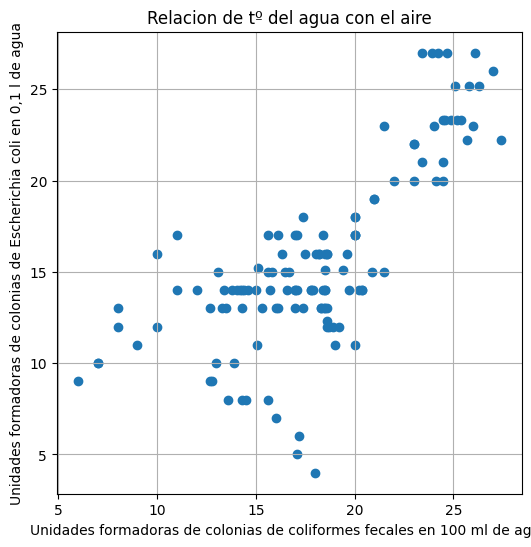

In [490]:
import matplotlib.pyplot as plt
mask = preprocessed_dataset['tem_agua'].notnull() & preprocessed_dataset['escher_coli_ufc_100ml'].notnull()
#plt.plot(preprocessed_dataset[mask]["colif_fecales_ufc_100ml"], preprocessed_dataset[mask]["escher_coli_ufc_100ml"])
plt.figure(figsize=(6,6))
plt.scatter(preprocessed_dataset[mask]["tem_agua"], preprocessed_dataset[mask]["tem_aire"])
plt.xlabel("Unidades formadoras de colonias de coliformes fecales en 100 ml de agua")
plt.ylabel("Unidades formadoras de colonias de Escherichia coli en 0,1 l de agua")

plt.title("Relacion de tº del agua con el aire")
plt.grid(True)

plt.show()

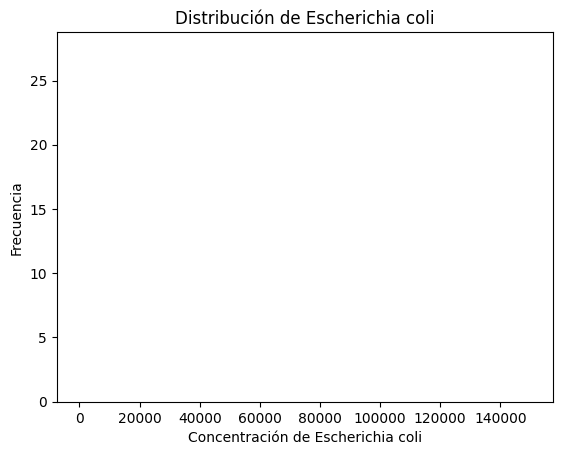

In [491]:
mask = preprocessed_dataset['escher_coli_ufc_100ml'].notnull() & preprocessed_dataset['tem_agua'].notnull()
plt.bar(preprocessed_dataset[mask]["escher_coli_ufc_100ml"],preprocessed_dataset[mask]["tem_agua"])
plt.title('Distribución de Escherichia coli')
plt.xlabel('Concentración de Escherichia coli')
plt.ylabel('Frecuencia')
plt.show()

In [492]:
preprocessed_dataset['escher_coli_ufc_100ml']=pd.to_numeric(preprocessed_dataset['escher_coli_ufc_100ml'], errors='coerce')

In [493]:
preprocessed_dataset['colif_fecales_ufc_100ml']=pd.to_numeric(preprocessed_dataset['colif_fecales_ufc_100ml'], errors='coerce')

In [494]:
preprocessed_dataset['enteroc_ufc_100ml']=pd.to_numeric(preprocessed_dataset['enteroc_ufc_100ml'], errors='coerce')

In [495]:
preprocessed_dataset.head(50)

sitios codigo      fecha campaña  tem_agua  \
0            Canal Villanueva y Río Luján  TI001  23/2/2022  Verano      24.5   
1            Río Lujan y Arroyo Caraguatá  TI006  23/2/2022  Verano      25.4   
2             Canal Aliviador y Río Lujan  TI002  23/2/2022  Verano      24.6   
3   Río Carapachay y Arroyo Gallo Fiambre  TI003  23/2/2022  Verano      25.2   
4             Río Reconquista y Río Lujan  TI004  23/2/2022  Verano      24.1   
5      Rio Tigre 100m antes del Rio Luján  TI005  23/2/2022  Verano      24.9   
6          Río Lujan y Canal San Fernando  TI007  23/2/2022  Verano      24.5   
7           Río Capitán y Río San Antonio  TI008  23/2/2022  Verano      24.5   
8          Arroyo Abra Vieja y Santa Rosa  TI009  23/2/2022  Verano      23.4   
9                                Del Arca  SF015  23/2/2022  Verano      21.5   
11                      Reserva Ecológica  SI022  23/2/2022  Verano      27.0   
13                            Perú Puente  SI023  23/2/2022  Verano      26.1   
21                Escollera de Propaneros  AV054  23/2/2022  Verano      27.4   
22             Polo Petroquímico Dock Sud  AV051  23/2/2022  Verano      25.7   
23                         Arroyo Sarandí  AV052  23/2/2022  Verano      26.3   
24                Costa de Villa Domínico  AV055  23/2/2022  Verano      25.1   
25                   Arroyo Santo Domingo  AV053  23/2/2022  Verano      25.8   
26                           Espora 400 m  QU061  23/2/2022  Verano      23.0   
27                          Náutico 400 m  QU062  23/2/2022  Verano      24.0   
28                    Pejerrey Club 400 m  QU063  23/2/2022  Verano      23.0   
29       Calle 14 y Costa - Salida cloaca  BZ078  23/2/2022  Verano      23.0   
31              Costanera Hudson Calle 63  BZ080  23/2/2022  Verano      26.0   
33                      Camping Eva Perón  EN081  23/2/2022  Verano      23.4   
34             Toma de agua Club de Pesca  EN082  23/2/2022  Verano      24.7   
35                         Arroyo El Gato  EN083  23/2/2022  Verano      24.2   
36      Ensenada Prefectura Isla Santiago  EN084  23/2/2022  Verano      23.9   
37                  Balneario Palo Blanco  BS092  23/2/2022  Verano      22.0   
38          Diagonal 66 (descarga cloaca)  BS095  23/2/2022  Verano      20.0   
39                     Playa La Bagliardi  BS091  23/2/2022  Verano      20.0   
40                    Balneario Municipal  BS094  23/2/2022  Verano      20.0   
41                      Playa La Balandra  BS093  23/2/2022  Verano      20.0   
42           Canal Villanueva y Río Luján  TI001   4/5/2022   otoño      19.6   
43           Río Lujan y Arroyo Caraguatá  TI006   4/5/2022   otoño      18.6   
44            Canal Aliviador y Río Lujan  TI002   4/5/2022   otoño      18.6   
45  Río Carapachay y Arroyo Gallo Fiambre  TI003   4/5/2022   otoño      18.2   
46            Río Reconquista y Río Lujan  TI004   4/5/2022   otoño      18.2   
47     Rio Tigre 100m antes del Rio Luján  TI005   4/5/2022   otoño      17.0   
48         Río Lujan y Canal San Fernando  TI007   4/5/2022   otoño      17.4   
49          Río Capitán y Río San Antonio  TI008   4/5/2022   otoño      18.3   
50         Arroyo Abra Vieja y Santa Rosa  TI009   4/5/2022   otoño      18.5   
51                               Del Arca  SF015   4/5/2022   otoño      17.0   
53                      Reserva Ecológica  SI022   4/5/2022   otoño      17.5   
54               Playa Espigón de Pacheco  SI024   4/5/2022   otoño      17.4   
55                            Perú Puente  SI023   4/5/2022   otoño      20.0   
63                Escollera de Propaneros  AV054   4/5/2022   otoño      17.8   
64             Polo Petroquímico Dock Sud  AV051   4/5/2022   otoño      17.8   
65                         Arroyo Sarandí  AV052   4/5/2022   otoño      18.4   
66                Costa de Villa Domínico  AV055   4/5/2022   otoño      17.0   
67                   Arroyo Santo Domingo  AV053   4/5/2022   otoñ

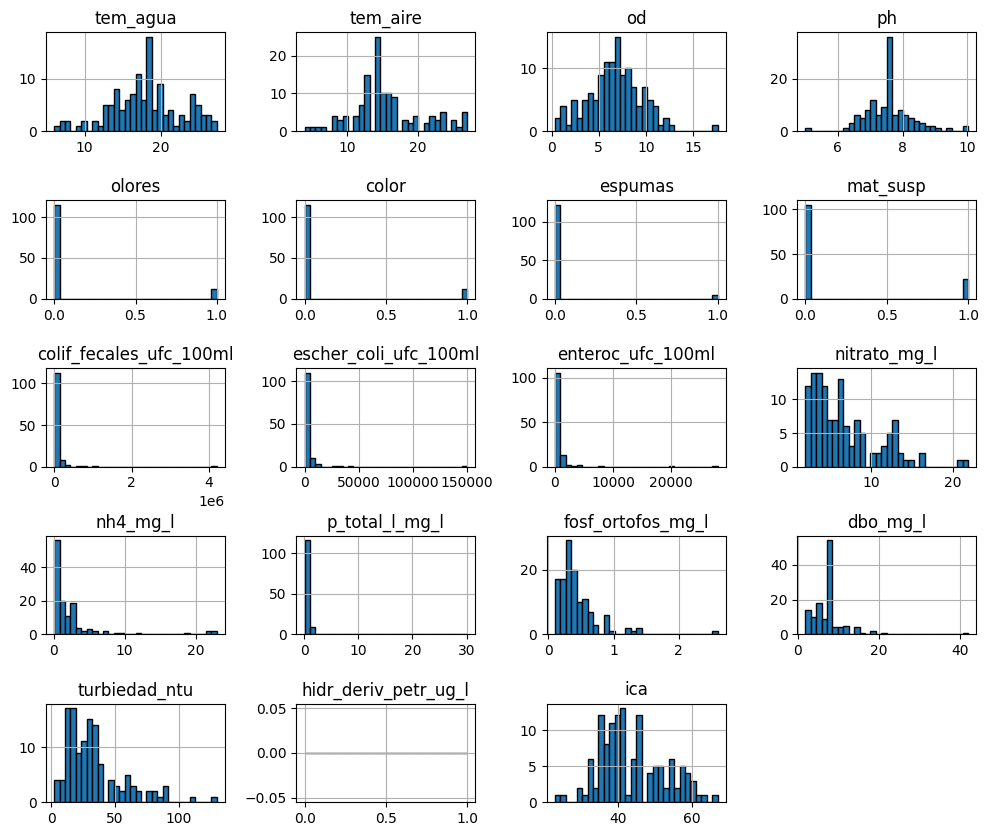

In [496]:
preprocessed_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

ARRANCAMOS ANALISIS UNIVARIADO:

In [497]:
preprocessed_dataset.describe()

tem_agua    tem_aire          od          ph      olores       color  \
count  127.000000  127.000000  127.000000  127.000000  127.000000  127.000000   
mean    17.982126   15.607874    6.714583    7.570000    0.094488    0.094488   
std      4.619357    4.961496    2.844410    0.718106    0.293665    0.293665   
min      6.000000    4.000000    0.360000    5.000000    0.000000    0.000000   
25%     15.070000   13.000000    5.105000    7.120000    0.000000    0.000000   
50%     18.200000   14.000000    6.714583    7.570000    0.000000    0.000000   
75%     20.400000   17.500000    8.460000    7.935000    0.000000    0.000000   
max     27.400000   27.000000   17.610000   10.020000    1.000000    1.000000   

          espumas    mat_susp  colif_fecales_ufc_100ml  escher_coli_ufc_100ml  \
count  127.000000  127.000000                    127.0                  127.0   
mean     0.039370    0.173228             86933.503937            3468.787402   
std      0.195244    0.379943             395063.09686           14390.902338   
min      0.000000    0.000000                     80.0                    1.0   
25%      0.000000    0.000000                   1150.0                  100.0   
50%      0.000000    0.000000                   3800.0                  300.0   
75%      0.000000    0.000000                  40000.0                 1650.0   
max      1.000000    1.000000                4200000.0               150000.0   

       enteroc_ufc_100ml  nitrato_mg_l    nh4_mg_l  p_total_l_mg_l  \
count              127.0    127.000000  127.000000      127.000000   
mean               931.0      6.625806    2.421241        0.749274   
std          3119.170583      4.116592    4.421074        2.654106   
min                  2.0      1.900000    0.049000        0.100000   
25%                 80.0      3.400000    0.225000        0.285000   
50%                270.0      5.700000    0.980000        0.400000   
75%                665.0      8.550000    2.421241        0.640000   
max              28000.0     21.900000   23.000000       30.120000   

       fosf_ortofos_mg_l    dbo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  \
count         127.000000  127.000000     127.000000                   0.0   
mean            0.437280    7.345455      33.136066                   NaN   
std             0.325282    4.568396      22.969794                   NaN   
min             0.100000    1.900000       2.500000                   NaN   
25%             0.245000    5.200000      17.500000                   NaN   
50%             0.350000    7.345455      28.000000                   NaN   
75%             0.525000    7.345455      38.500000                   NaN   
max             2.600000   42.000000     130.000000                   NaN   

             ica  
count      127.0  
mean   43.850394  
std     8.871283  
min         23.0  
25%         37.0  
50%         42.0  
75%         50.0  
max         67.0

SITIOS:  Localización específica donde se realizó el muestreo del agua. Categórica nominal

In [498]:
preprocessed_dataset["sitios"].value_counts()

sitios
Canal Villanueva y Río Luján             4
Río Lujan y Arroyo Caraguatá             4
Canal Aliviador y Río Lujan              4
Río Carapachay y Arroyo Gallo Fiambre    4
Río Reconquista y Río Lujan              4
Rio Tigre 100m antes del Rio Luján       4
Río Lujan y Canal San Fernando           4
Río Capitán y Río San Antonio            4
Arroyo Abra Vieja y Santa Rosa           4
Del Arca                                 4
Polo Petroquímico Dock Sud               4
Escollera de Propaneros                  4
Arroyo Santo Domingo                     4
Espora 400 m                             4
Arroyo Sarandí                           4
Costa de Villa Domínico                  4
Náutico 400 m                            4
Pejerrey Club 400 m                      4
Costanera Hudson Calle 63                4
Calle 14 y Costa - Salida cloaca         4
Arroyo El Gato                           4
Ensenada Prefectura Isla Santiago        4
Camping Eva Perón                        4
Toma

Vemos que hay zonas con cercanías. Buscamos puntos de encuentro que se repitan

In [499]:
from collections import Counter

# Supongamos que raw_dataset es tu DataFrame y 'columna_texto' es la columna que contiene las oraciones
all_words = ' '.join(preprocessed_dataset['sitios']).split()
word_counts = Counter(all_words)

# Convertir el resultado a un DataFrame para una mejor visualización
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Palabra', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)
pd.set_option('display.max_rows', None)
# Mostrar el conteo de palabras
print(word_counts_df)

         Palabra  Frecuencia
2              y          38
3            Río          36
6         Arroyo          24
33            de          20
5          Lujan          16
46           400          12
47             m          12
0          Canal          12
40         Costa          10
4          Luján           8
13           Rio           8
18           San           8
50          Club           8
51         Calle           8
78         Playa           7
65            El           6
71     Balneario           6
79            La           5
85        Puerto           5
28       Reserva           5
16         antes           4
12   Reconquista           4
11       Fiambre           4
10         Gallo           4
15          100m           4
9     Carapachay           4
1     Villanueva           4
7      Caraguatá           4
8      Aliviador           4
27          Arca           4
26           Del           4
25          Rosa           4
24         Santa           4
22          Ab

No se aprecian grupos muy grandes, a excepción de Luján, o cercanía a rios, arroyos o playa y demases. Se crea una columna nueva, si está cerca del mar el agua es duvle.

In [500]:
# Definir las palabras clave
keywords = ['Playa', 'Costanera', 'Costa', 'Camping', 'Pescadores']

# Crear una expresión regular que busque cualquiera de las palabras clave
pattern = '|'.join(keywords)

# Crear la nueva columna binaria
preprocessed_dataset['es_salada'] = preprocessed_dataset['sitios'].str.contains(pattern, case=False, regex=True).astype(int)

# Verificar los cambios
print(preprocessed_dataset[['sitios', 'es_salada']])

                                    sitios  es_salada
0             Canal Villanueva y Río Luján          0
1             Río Lujan y Arroyo Caraguatá          0
2              Canal Aliviador y Río Lujan          0
3    Río Carapachay y Arroyo Gallo Fiambre          0
4              Río Reconquista y Río Lujan          0
5       Rio Tigre 100m antes del Rio Luján          0
6           Río Lujan y Canal San Fernando          0
7            Río Capitán y Río San Antonio          0
8           Arroyo Abra Vieja y Santa Rosa          0
9                                 Del Arca          0
11                       Reserva Ecológica          0
13                             Perú Puente          0
21                 Escollera de Propaneros          0
22              Polo Petroquímico Dock Sud          0
23                          Arroyo Sarandí          0
24                 Costa de Villa Domínico          1
25                    Arroyo Santo Domingo          0
26                          

CODIGO: Identificador único para cada muestra o estación de muestreo. Categórico nominal.

In [501]:
preprocessed_dataset["codigo"].value_counts()

codigo
TI001    4
TI006    4
TI002    4
TI003    4
TI004    4
TI005    4
TI007    4
TI008    4
TI009    4
SF015    4
AV051    4
AV054    4
AV053    4
QU061    4
AV052    4
AV055    4
QU062    4
QU063    4
BZ080    4
BZ078    4
EN083    4
EN084    4
EN081    4
EN082    4
SI022    3
SI023    3
BS092    3
BS095    3
BS094    3
BS093    3
BZ077    3
BS091    2
SI024    2
VL033    2
VL032    2
VL031    2
Name: count, dtype: int64

Al haber varias muestras de cada tipo de agua, al no haber filas repetidas, se considera que son de distintas muestras en el tiempo. Se evaluará luego.

In [502]:
preprocessed_dataset['codigo'] = preprocessed_dataset['codigo'].replace('EN-extra', '0')
if preprocessed_dataset['codigo'].dtype != 'Int64':
    preprocessed_dataset['codigo'] = preprocessed_dataset['codigo'].str.replace(r'[^\d]', '', regex=True)
preprocessed_dataset["codigo"] = preprocessed_dataset["codigo"].astype("Int64")

# Verificar los cambios
preprocessed_dataset["codigo"].value_counts()

codigo
1     4
6     4
2     4
3     4
4     4
5     4
7     4
8     4
9     4
15    4
51    4
54    4
53    4
61    4
52    4
55    4
62    4
63    4
80    4
78    4
83    4
84    4
81    4
82    4
22    3
23    3
92    3
95    3
94    3
93    3
77    3
91    2
24    2
33    2
32    2
31    2
Name: count, dtype: Int64

FECHA: Fecha en la que se tomó la muestra de agua. Variable discreta

In [503]:
preprocessed_dataset["fecha"].value_counts()

fecha
4/5/2022      33
23/8/2022     32
23/2/2022     31
31/10/2022    29
31/10/0202     2
Name: count, dtype: int64

Las filas que tiene entradas ilógicas se arreglan sus valores, ya que quedaría una fecha con sentido en el contexto del análisis 

In [504]:
preprocessed_dataset['fecha'] = preprocessed_dataset['fecha'].str.replace("31/10/0202", "31/10/2022")

In [505]:
preprocessed_dataset["fecha"].value_counts()

fecha
4/5/2022      33
23/8/2022     32
23/2/2022     31
31/10/2022    31
Name: count, dtype: int64

Al ver que solo hay 4 fechas, se  podria eliminar la columna de la estación del año, debido a que ya cada fecha corresponde a una estación. no se hace debido a que las esraciones son el fin de la investigacion, se asignan numeros que representen a cada fecha.

In [506]:
# Definir un diccionario de reemplazo
reemplazos = {
    '23/2/2022': 0,
    '4/5/2022': 2,
    '23/8/2022': 3,
    '31/10/2022': 1
}

# Reemplazar las fechas en la columna 'fecha'. De estación mas calida a mas fria
preprocessed_dataset['fecha'] = preprocessed_dataset['fecha'].replace(reemplazos)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\1886943182.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['fecha'] = preprocessed_dataset['fecha'].replace(reemplazos)


In [507]:
preprocessed_dataset['fecha'] = pd.to_numeric(preprocessed_dataset['fecha'], errors='coerce')
preprocessed_dataset['fecha'].fillna(preprocessed_dataset['fecha'].mean(), inplace=True)
preprocessed_dataset['fecha'] = preprocessed_dataset['fecha'].astype(float)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\2577973245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preprocessed_dataset['fecha'].fillna(preprocessed_dataset['fecha'].mean(), inplace=True)


In [508]:
#preprocessed_dataset = preprocessed_dataset.drop('campaña', axis=1)

TEM_AGUA: Temperatura del agua en grados Celsius. Valor numérico continuo.

In [509]:
preprocessed_dataset["tem_agua"].value_counts()

tem_agua
20.00    6
18.50    5
18.60    5
17.00    4
14.30    3
23.00    3
24.50    3
17.10    3
15.60    3
17.80    2
18.40    2
12.70    2
8.00     2
16.10    2
16.00    2
18.20    2
18.30    2
17.40    2
7.00     2
23.40    2
21.50    2
21.00    2
20.40    2
22.00    1
23.90    1
24.20    1
24.70    1
24.00    1
26.00    1
25.10    1
25.80    1
27.40    1
26.10    1
26.30    1
25.70    1
27.00    1
25.20    1
24.10    1
24.90    1
25.40    1
24.60    1
16.70    1
15.80    1
19.60    1
17.50    1
15.30    1
17.90    1
13.80    1
6.00     1
14.40    1
13.30    1
13.50    1
16.50    1
14.50    1
13.60    1
13.10    1
16.30    1
15.03    1
14.06    1
16.60    1
14.20    1
14.60    1
15.70    1
10.01    1
15.10    1
13.90    1
13.00    1
12.80    1
12.00    1
13.40    1
11.01    1
10.00    1
11.00    1
20.90    1
9.00     1
20.20    1
19.70    1
19.00    1
19.20    1
19.40    1
18.89    1
18.43    1
15.04    1
18.06    1
18.70    1
17.20    1
18.00    1
Name: count, dtype: int64

Se pueden ver cinco valores inferiores a 9,20, que, según lo averigüado, es la mínima en estos últimos 4 años en el Río de la Plata. Como no pudimos contrastar con mucha evidencia, decidimos no borrar las filas.

Buscamos la distribución de las muestras

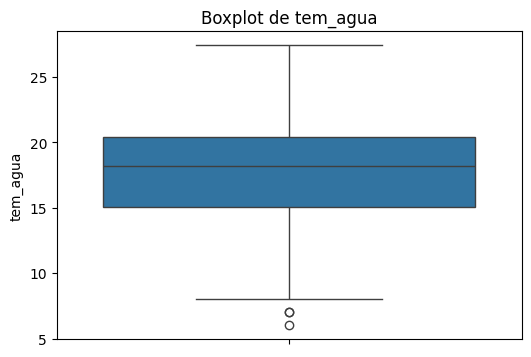

In [510]:
import seaborn as sns
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="tem_agua", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de tem_agua')
plt.ylabel('tem_agua')

# Mostrar el gráfico
plt.show()

Se aprecia una distribución de datos donde estos se encuentran simáetricamente alrededor de la mediana. No se ven valores atípicos. 

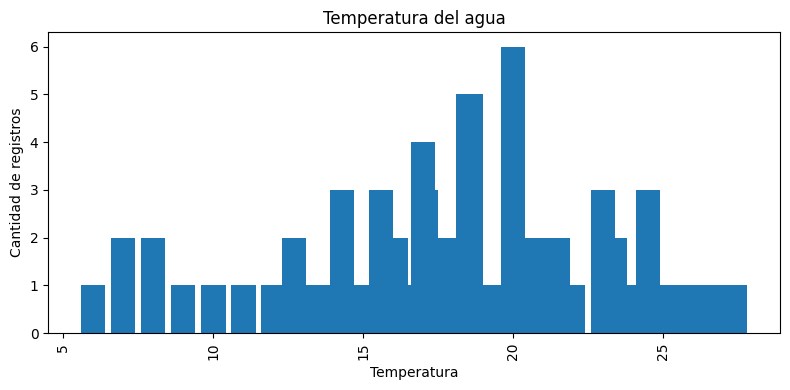

In [511]:
import matplotlib.pyplot as plt

# contamos las frecuencias de cada valor
agua_counts = preprocessed_dataset['tem_agua'].value_counts()

# ordenamos las frecuencias de mayor a menor
agua_counts = agua_counts.sort_values(ascending=False)

# graficamos el histograma
plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura si es necesario
plt.bar(agua_counts.index, agua_counts.values)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Temperatura')
plt.ylabel('Cantidad de registros')
plt.title('Temperatura del agua')
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

Se ve que no tiene una distribuicón tan simáetrica como la pensada

TEM_AIRE: Temperatura del aire en grados Celsius. Valor numérico continuo

In [512]:
preprocessed_dataset["tem_aire"].value_counts()

tem_aire
14.0    25
13.0    15
16.0    10
17.0     9
15.0     7
12.0     6
23.3     5
27.0     5
20.0     4
11.0     4
10.0     4
8.0      4
25.2     3
18.0     3
23.0     3
9.0      3
15.1     2
22.0     2
22.2     2
21.0     2
19.0     2
26.0     1
15.2     1
12.3     1
7.0      1
6.0      1
4.0      1
5.0      1
Name: count, dtype: int64

Vemos el comportamiento generalizado según cada muestra.

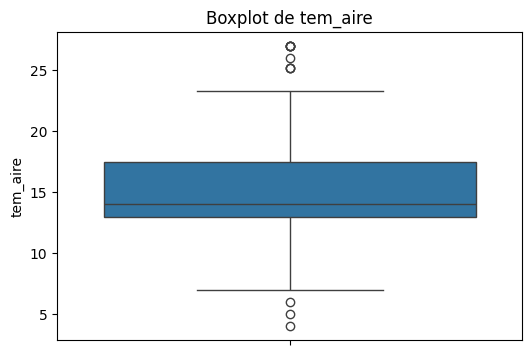

In [513]:
import seaborn as sns
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="tem_aire", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de tem_aire')
plt.ylabel('tem_aire')

# Mostrar el gráfico
plt.show()

Se ven dos outliers, al ser valores de temperatura que podrían ser reales, no se eliminan

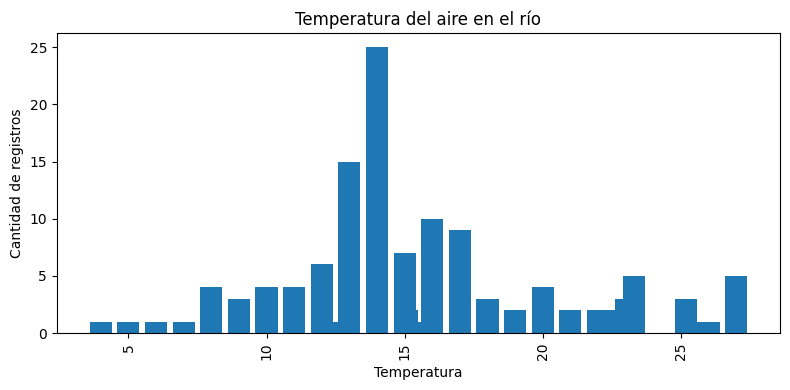

In [514]:
import matplotlib.pyplot as plt

# contamos las frecuencias de cada valor
aire_counts = preprocessed_dataset['tem_aire'].value_counts()

# ordenamos las frecuencias de mayor a menor
aire_counts = aire_counts.sort_values(ascending=False)

# graficamos el histograma
plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura si es necesario
plt.bar(aire_counts.index, aire_counts.values)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Temperatura')
plt.ylabel('Cantidad de registros')
plt.title('Temperatura del aire en el río')
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

Se ve que los outliers no lo son necesariamente.

OD: Oxígeno disuelto, medido en miligramos por litro (mg/L), esencial para la vida acuática.

In [515]:
preprocessed_dataset['od'].value_counts().sort_index()

od
0.360000     1
0.450000     1
1.020000     1
1.130000     1
1.390000     1
1.500000     1
1.800000     1
2.170000     1
2.220000     1
2.250000     1
2.280000     1
2.490000     1
2.940000     1
3.090000     1
3.300000     1
3.430000     1
3.500000     1
3.540000     1
3.630000     1
3.850000     1
3.990000     1
4.130000     1
4.280000     2
4.290000     1
4.430000     1
4.460000     1
4.490000     1
4.780000     1
4.900000     1
5.050000     1
5.070000     1
5.140000     1
5.240000     1
5.300000     1
5.360000     2
5.370000     1
5.470000     1
5.560000     1
5.680000     1
5.700000     1
5.710000     1
5.770000     1
5.790000     1
5.800000     1
5.830000     1
5.970000     1
6.030000     1
6.100000     1
6.190000     1
6.210000     1
6.240000     1
6.300000     1
6.350000     1
6.400000     1
6.430000     1
6.500000     1
6.560000     1
6.590000     1
6.600000     1
6.700000     1
6.714583     7
6.910000     1
6.990000     1
7.000000     1
7.060000     1
7.170000     1
7.20000

El nivel de oxígeno dependerá de su tº, luego se analizará si es con sentido práctico o no debido a que la solubilidad del oxígeno en agua dulce varía entre 14.6 mg/L a 0°C hasta aproximadamente 7 mg/L a 35°C bajo una presión de 760 mmHg.

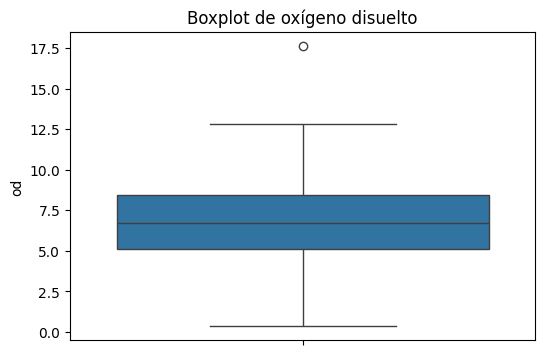

In [516]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="od", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de oxígeno disuelto')
plt.ylabel('od')

# Mostrar el gráfico
plt.show()

 PH: Medida de la acidez o alcalinidad del agua, en una escala de 0 a 14. Numérico continuo. Mientras mas cercano a 0 mas ácida el agua, mientras mas alta mas alcalina.

In [517]:
preprocessed_dataset['ph'].value_counts().sort_index()

ph
5.00      1
6.20      1
6.37      1
6.39      1
6.48      1
6.53      1
6.54      1
6.56      2
6.59      1
6.66      1
6.72      1
6.74      1
6.76      2
6.80      1
6.85      1
6.88      1
6.90      1
6.92      1
6.93      1
6.94      1
7.00      2
7.02      1
7.03      1
7.05      1
7.06      1
7.08      1
7.09      1
7.10      1
7.12      2
7.13      1
7.14      1
7.16      1
7.23      1
7.25      1
7.29      1
7.30      2
7.32      1
7.39      1
7.40      1
7.42      1
7.43      1
7.45      1
7.46      1
7.47      1
7.48      1
7.50      1
7.51      1
7.52      1
7.55      1
7.57     28
7.58      1
7.60      2
7.61      1
7.66      1
7.75      1
7.76      3
7.81      1
7.84      1
7.91      1
7.93      1
7.94      1
7.99      3
8.00      1
8.01      1
8.02      1
8.09      1
8.11      2
8.13      1
8.14      1
8.20      1
8.22      1
8.23      1
8.27      1
8.31      1
8.37      1
8.44      1
8.47      1
8.50      1
8.52      1
8.59      1
8.62      1
8.81      1
8.83      1
8

No se ven valores fuera de medida o de contexto a priori.

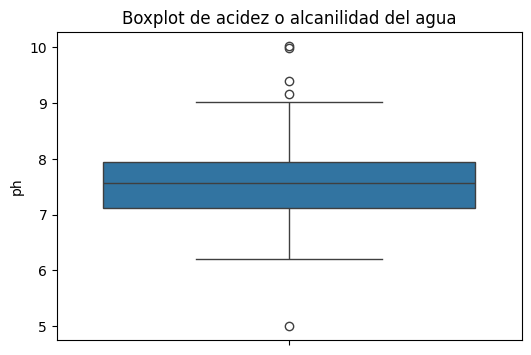

In [518]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="ph", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de acidez o alcanilidad del agua')
plt.ylabel('ph')

# Mostrar el gráfico
plt.show()

Al ser posibles valores teóricos los outliers, no se los descarta.

OLORES: Presencia de olores en el agua, que puede mostrar contaminación. Binaria: 0 si no tiene olor, 1 si tiene olor. Categórico nominal.

In [519]:
preprocessed_dataset['olores'].value_counts()

olores
0    115
1     12
Name: count, dtype: int64

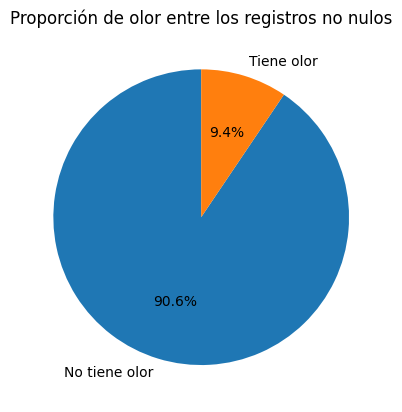

In [520]:
olor_counts = preprocessed_dataset["olores"].value_counts()

# Crear el gráfico de torta
labels = ["No tiene olor" if label == False else "Tiene olor" for label in olor_counts.index]
plt.pie(olor_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Agregar un título al gráfico
plt.title("Proporción de olor entre los registros no nulos")

# Mostrar el gráfico
plt.show()

COLOR: Color del agua, que puede ser un indicador de la calidad del agua. Binaria: 0 incolora, 1 colora. Atributo categórico nominal.

In [521]:
preprocessed_dataset['color'].value_counts()

color
0    115
1     12
Name: count, dtype: int64

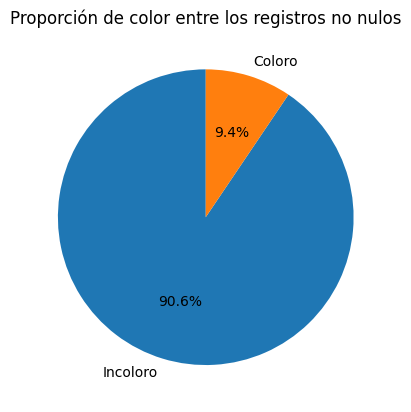

In [522]:
color_counts = preprocessed_dataset["color"].value_counts()

# Crear el gráfico de torta
labels = ["Incoloro" if label == False else "Coloro" for label in color_counts.index]
plt.pie(color_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Agregar un título al gráfico
plt.title("Proporción de color entre los registros no nulos")

# Mostrar el gráfico
plt.show()

ESPUMAS: Presencia de espumas en la superficie del agua, que puede ser un signo de contaminación. Atributo binarip. 0 si no contiene espumas, 1 si contiene. Categórico nominal

In [523]:
preprocessed_dataset['espumas'].value_counts()

espumas
0    122
1      5
Name: count, dtype: int64

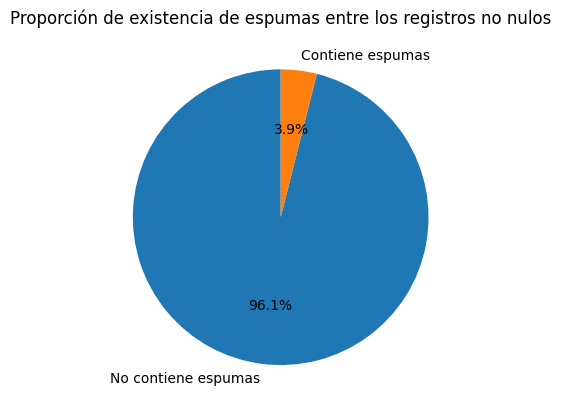

In [524]:
espumas_counts = preprocessed_dataset["espumas"].value_counts()

# Crear el gráfico de torta
labels = ["No contiene espumas" if label == False else "Contiene espumas" for label in espumas_counts.index]
plt.pie(espumas_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Agregar un título al gráfico
plt.title("Proporción de existencia de espumas entre los registros no nulos")

# Mostrar el gráfico
plt.show()

MAT_SUSP: Materia suspendida, que se refiere a partículas sólidas que flotan en el agua. Atributo binario: 0 si no contiene materia suspendida, 1 si contiene materia suspendida. Categórico nominal.

In [525]:
preprocessed_dataset['mat_susp'].value_counts()

mat_susp
0    105
1     22
Name: count, dtype: int64

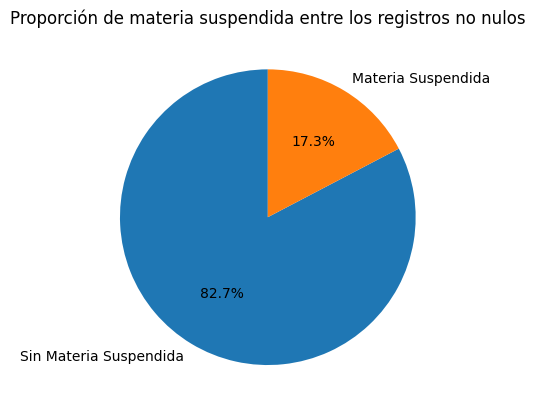

In [526]:
ms_counts = preprocessed_dataset["mat_susp"].value_counts()

# Crear el gráfico de torta
labels = ["Sin Materia Suspendida" if label == False else "Materia Suspendida" for label in ms_counts.index]
plt.pie(ms_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Agregar un título al gráfico
plt.title("Proporción de materia suspendida entre los registros no nulos")

# Mostrar el gráfico
plt.show()

COLIF FECALES UFC 100 ml: Unidades formadoras de colonias de coliformes fecales en 100 ml de agua, un indicador de contaminación fecal. Numérico Disceto

In [527]:
preprocessed_dataset["colif_fecales_ufc_100ml"].value_counts().sort_index()

colif_fecales_ufc_100ml
80         1
95         1
120        1
130        1
160        1
200        1
210        1
300        2
360        1
400        2
500        1
560        1
600        3
700        2
750        1
800        1
830        1
900        2
1000       5
1060       1
1100       2
1200       3
1300       3
1400       4
1600       3
1800       2
2100       1
2200       3
2400       2
2500       2
2700       1
3000       3
3200       2
3500       2
3800       1
4000       2
4200       1
5000       2
5200       1
6000       3
6500       2
6600       1
10000      2
12000      1
13000      1
15200      1
16000      1
18000      1
20000      5
27000      2
28000      2
30000      2
40000      4
50000      2
58000      1
60000      1
70000      2
76000      1
80000      1
90000      1
92000      1
96000      1
100000     1
103000     1
106000     1
120000     1
150000     2
160000     1
170000     1
192000     1
240000     1
270000     1
280000     1
400000     1
420000     1
7

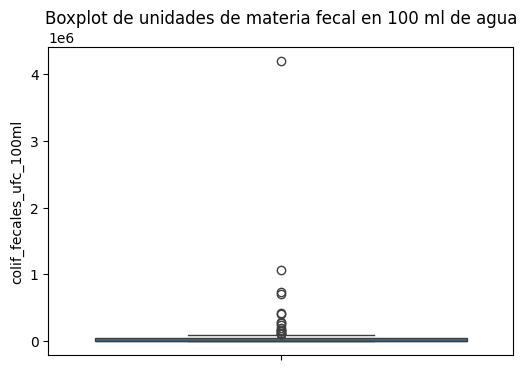

In [528]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="colif_fecales_ufc_100ml", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de unidades de materia fecal en 100 ml de agua')
plt.ylabel('colif_fecales_ufc_100ml')

# Mostrar el gráfico
plt.show()

Debido a que los outliers no concuerdan con muestras tomadas en otros rios o en el Rio de La Plata mismo los eliminamos.

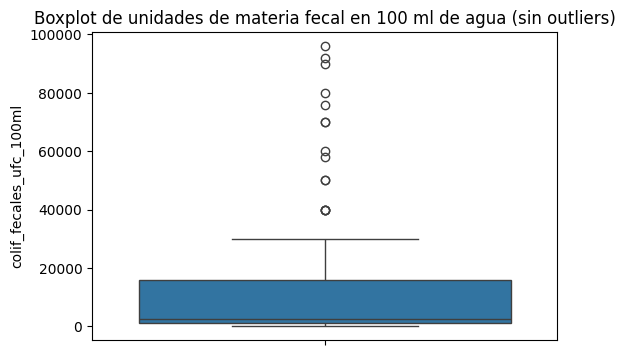

In [529]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = preprocessed_dataset['colif_fecales_ufc_100ml'].quantile(0.25)
Q3 = preprocessed_dataset['colif_fecales_ufc_100ml'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
filtered_data = preprocessed_dataset[(preprocessed_dataset['colif_fecales_ufc_100ml'] >= lower_bound) & (preprocessed_dataset['colif_fecales_ufc_100ml'] <= upper_bound)]

# Crear el boxplot sin outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y='colif_fecales_ufc_100ml', data=filtered_data)

# Añadir título y etiquetas
plt.title('Boxplot de unidades de materia fecal en 100 ml de agua (sin outliers)')
plt.ylabel('colif_fecales_ufc_100ml')

# Mostrar el gráfico
plt.show()

ESCHER COLI UFC 100 ml: Unidades formadoras de colonias de Escherichia coli en 100 ml de agua, otro indicador de contaminación fecal. Numérico discreto.

In [530]:
preprocessed_dataset["escher_coli_ufc_100ml"].value_counts().sort_index()

escher_coli_ufc_100ml
1          1
2          1
3          2
4          1
5          1
6          4
9          1
13         1
15         1
16         1
20         1
30         1
35         1
50         2
60         1
70         1
80         3
90         1
100       15
110        2
130        1
150        1
160        1
186        1
200       12
230        1
290        1
300        6
330        2
370        1
400        2
430        1
440        1
500        3
560        1
600        2
700        1
720        1
800        3
820        1
850        1
930        1
1000       3
1100       1
1350       1
1500       1
1600       2
1700       1
2000       3
2100       2
2300       1
2800       1
3000       1
3600       1
4000       1
4200       2
4500       1
5000       1
5200       2
6000       2
6200       1
6600       2
8000       1
10000      2
11500      1
12000      1
14400      1
28000      1
35000      1
44000      1
150000     1
Name: count, dtype: Int64

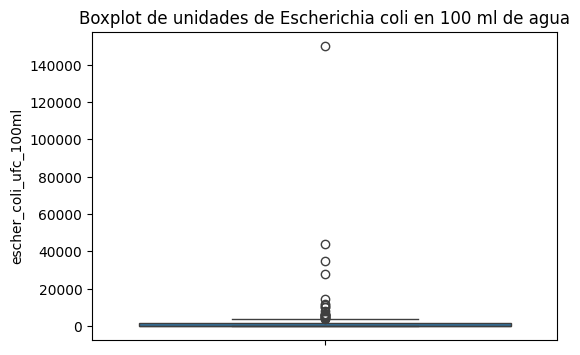

In [531]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="escher_coli_ufc_100ml", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de unidades de Escherichia coli en 100 ml de agua')
plt.ylabel('escher_coli_ufc_100ml')

# Mostrar el gráfico
plt.show()

Debido a que los outliers no concuerdan con muestras tomadas en otros rios o en el Rio de La Plata mismo los eliminamos.

ENTEROC UFC 100 ML: Unidades formadoras de colonias de enterococos en 100 ml de agua, que también indican contaminación fecal. Atributo discreto.

In [532]:
preprocessed_dataset["enteroc_ufc_100ml"].value_counts().sort_index()

enteroc_ufc_100ml
2        3
3        1
4        1
5        2
9        1
10       4
11       1
20       4
24       1
27       1
30       2
40       3
45       2
50       5
80       3
90       2
100      6
110      2
113      1
120      1
130      2
140      2
160      2
180      2
190      1
220      2
230      1
250      2
260      2
270      2
300      5
310      1
320      1
350      1
360      1
370      2
380      2
400      1
420      1
440      1
450      2
460      1
550      1
570      1
580      2
600      3
610      1
620      1
640      2
660      1
670      1
700      1
730      1
750      1
760      1
770      1
780      1
800      2
850      2
1100     3
1160     1
1200     1
1440     1
1500     4
1540     1
1580     1
1800     1
2200     1
2500     1
3300     1
4000     1
4200     1
7500     1
20000    1
28000    1
Name: count, dtype: Int64

nitrato mg l: Concentración de nitratos en miligramos por litro (mg/L), que puede indicar contaminación por fertilizantes. Cuantitativo continuo Según la OMS valores mayores a 50 mg/l se considera peligroso para la salud.

In [533]:

preprocessed_dataset['nitrato_mg_l'].value_counts()

nitrato_mg_l
3.300000     5
1.900000     4
3.700000     4
5.900000     3
6.625806     3
3.600000     3
6.100000     3
2.600000     3
3.900000     3
8.500000     3
2.000000     3
2.900000     3
2.700000     3
13.200000    2
5.600000     2
10.000000    2
4.400000     2
8.800000     2
6.500000     2
5.400000     2
2.100000     2
11.300000    2
3.400000     2
5.100000     2
7.700000     2
10.800000    2
4.300000     2
4.100000     2
4.700000     2
6.300000     2
12.600000    2
12.200000    2
5.700000     2
2.800000     2
3.100000     1
7.400000     1
2.200000     1
5.200000     1
13.100000    1
8.000000     1
6.000000     1
8.900000     1
8.600000     1
6.900000     1
6.200000     1
5.800000     1
12.100000    1
11.900000    1
11.500000    1
4.500000     1
8.300000     1
8.200000     1
4.000000     1
6.800000     1
2.400000     1
3.000000     1
21.900000    1
12.500000    1
6.400000     1
8.400000     1
13.000000    1
16.400000    1
12.800000    1
20.600000    1
8.700000     1
16.300000   

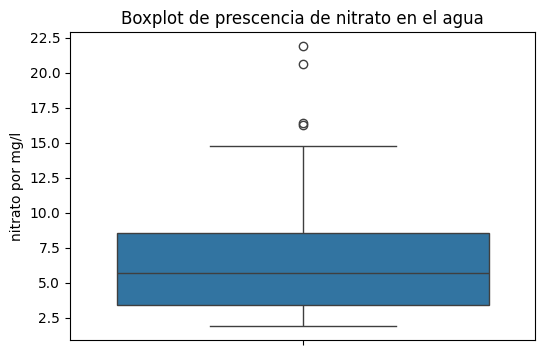

In [534]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="nitrato_mg_l", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de prescencia de nitrato en el agua')
plt.ylabel('nitrato por mg/l')

# Mostrar el gráfico
plt.show()

Las muestras no sugieren contaminacion por fertilizantes en el agua.

nh4 mg l: Concentración de amonio en miligramos por litro (mg/L), que puede ser un indicador de contaminación orgánica. Valor cuantitativo continuo.

Según la OMS los valores recomendados de concentracion de amonio en el agua debe ser <0.2 mg/l para evitar sabores u olores extraños.

In [535]:
preprocessed_dataset['nh4_mg_l'].value_counts().sort_index()

nh4_mg_l
0.049000     11
0.050000      2
0.060000      2
0.080000      2
0.100000      5
0.110000      2
0.120000      1
0.150000      1
0.170000      1
0.180000      2
0.210000      1
0.220000      2
0.230000      1
0.250000      1
0.260000      1
0.280000      1
0.330000      1
0.400000      1
0.410000      3
0.420000      1
0.440000      1
0.450000      3
0.490000      1
0.510000      1
0.600000      1
0.640000      1
0.660000      1
0.710000      1
0.720000      1
0.740000      1
0.750000      1
0.800000      1
0.830000      2
0.910000      1
0.930000      1
0.950000      1
0.970000      1
0.980000      2
1.000000      4
1.100000      2
1.300000      3
1.400000      1
1.500000      2
1.600000      1
1.700000      1
1.900000      3
2.000000      4
2.200000      1
2.300000      1
2.421241     15
2.500000      1
2.900000      1
3.100000      2
3.300000      2
3.500000      1
3.800000      1
3.900000      1
4.100000      1
4.800000      1
5.000000      1
5.200000      1
5.600000      1

Se obvservan muchos valores mayores al 0.2 mg/l recomendados por la OMS

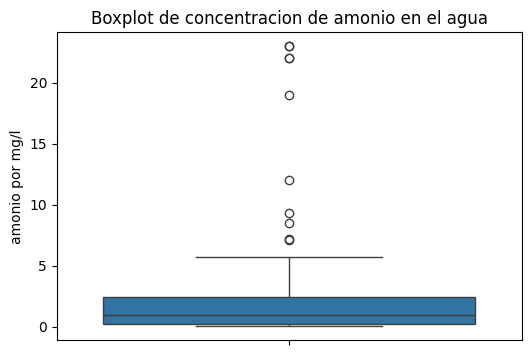

In [536]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="nh4_mg_l", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de concentracion de amonio en el agua')
plt.ylabel('amonio por mg/l')

# Mostrar el gráfico
plt.show()


Los valores se concentran cerca del minimo y se observan muchos outliers, por lo que puede haber una relacion entre las altas concentraciones de amonio y los olores presentes en las muestras.

p_total_l_mg _l: Fósforo total en miligramos por litro (mg/L), que incluye todas las formas de fósforo en el agua. Cuantitativo continuo.

Valores altos de fosfato pueden producir eutrofización (crecimiento excesivo de algas debido a altos nutrientes), valores mayores a 0.03 indican aguas Altamente eutróficas. Estas aguas pueden estar en presencia de contaminantes de origen agrícolas.

In [537]:
preprocessed_dataset['p_total_l_mg_l'].value_counts().sort_index()

p_total_l_mg_l
0.100000     1
0.110000     1
0.120000     1
0.130000     2
0.140000     1
0.150000     1
0.170000     2
0.180000     1
0.190000     3
0.200000     1
0.210000     1
0.220000     1
0.230000     4
0.240000     1
0.250000     3
0.260000     3
0.270000     2
0.280000     3
0.290000     3
0.300000     1
0.310000     3
0.320000     2
0.330000     6
0.340000     2
0.350000     2
0.360000     4
0.370000     2
0.380000     1
0.390000     3
0.400000     3
0.410000     1
0.420000     3
0.430000     2
0.440000     1
0.450000     1
0.470000     2
0.490000     3
0.510000     3
0.520000     2
0.530000     1
0.540000     3
0.550000     2
0.570000     3
0.590000     2
0.620000     1
0.630000     1
0.650000     2
0.670000     1
0.690000     1
0.700000     1
0.710000     1
0.730000     1
0.749274     3
0.760000     1
0.770000     1
0.780000     1
0.790000     1
0.800000     1
0.850000     1
0.860000     2
0.880000     1
0.950000     1
1.100000     1
1.200000     4
1.300000     1
1.400000  

Se observa que todos los valores son mayores a los valores normales.

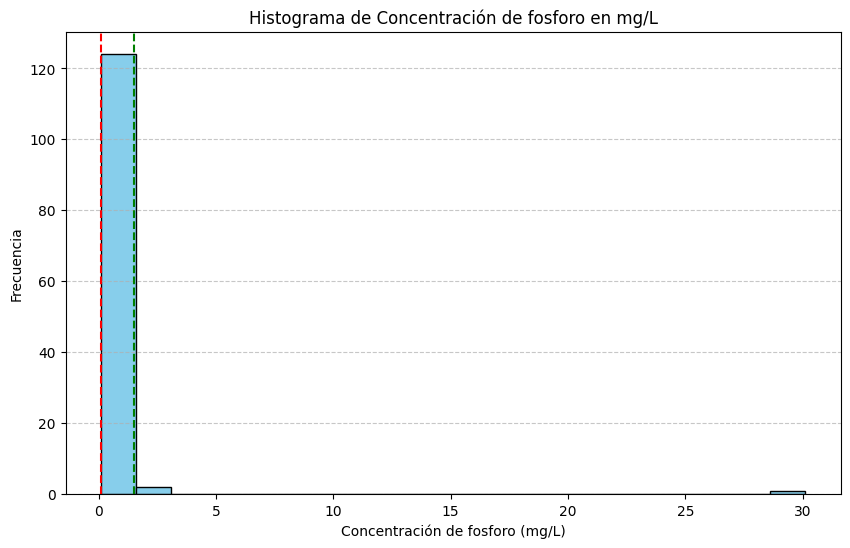

In [538]:
plt.figure(figsize=(10, 6))
plt.hist(preprocessed_dataset['p_total_l_mg_l'], bins=20, color='skyblue', edgecolor='black')

plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1.5, label='0.1 mg/L')
plt.axvline(x=1.5, color='green', linestyle='--', linewidth=1.5, label='1.5 mg/L')

plt.xlabel("Concentración de fosforo (mg/L)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Concentración de fosforo en mg/L")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Casi todos los valores se encuentran entre 0.1 mg/l y 1.5 mg/l por lo que la gran mayoría de las muestras cuentan con altas cantidades de fosforo.

fosf_ortofos_mg_l: Concentración de ortofosfatos en miligramos por litro (mg/L), que es un nutriente importante. Valor cuantitativo continuo.

Es otra forma del fosoforo, por lo que no aportaria informacion al analisis.

dbo_mg_l: Demanda biológica de oxígeno en miligramos por litro (mg/L), que mide la cantidad de oxígeno requerido por microorganismos para descomponer materia orgánica.

Agua Pura: desde 0 a 20 mg/litro Agua Levemente Contaminada: desde 20 a 100 mg/litro Agua Moderadamente Contaminada: desde 100 a 500 mg/litro Agua Muy Contaminada: desde 500 a 3.000 mg/litro Agua Extremadamente Contaminada: desde los 3.000 mg/litro

In [539]:
preprocessed_dataset['dbo_mg_l'].value_counts().sort_index()

dbo_mg_l
1.900000      7
2.000000      1
2.300000      1
2.400000      1
2.500000      2
2.600000      1
2.800000      1
3.400000      1
3.500000      2
3.600000      1
3.700000      1
3.900000      1
4.100000      1
4.200000      1
4.300000      1
4.400000      1
4.600000      2
4.700000      1
5.000000      3
5.100000      1
5.200000      3
5.400000      2
5.500000      1
5.600000      1
5.700000      1
5.800000      3
6.200000      1
6.500000      3
6.800000      2
7.100000      2
7.200000      1
7.300000      2
7.345455     50
7.400000      1
8.400000      1
9.000000      1
9.200000      1
9.300000      1
9.400000      1
10.000000     2
11.000000     2
12.000000     5
14.000000     3
15.000000     1
16.000000     1
18.000000     2
21.000000     1
42.000000     1
Name: count, dtype: int64

Se observan solo dos valores que indican que la muestra no fue tomada de agua pura y que esta levemente contaminada.

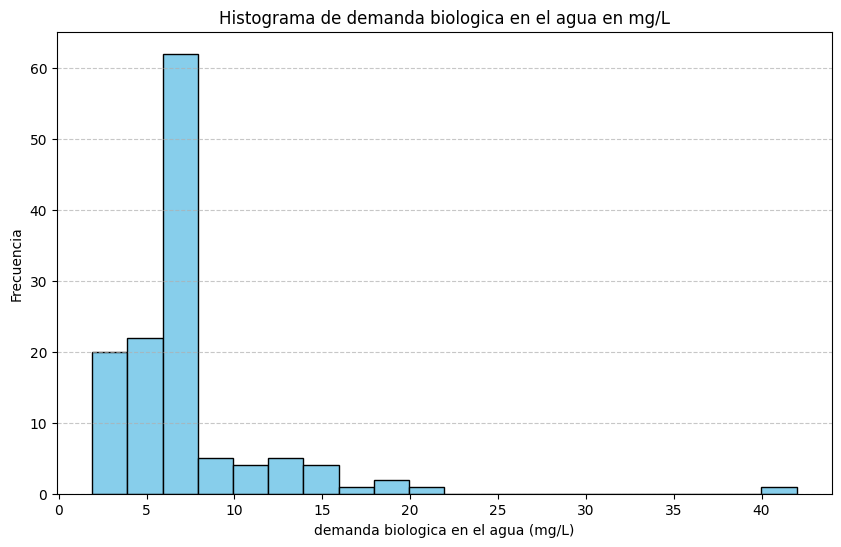

In [540]:
plt.figure(figsize=(10, 6))
plt.hist(preprocessed_dataset['dbo_mg_l'], bins=20, color='skyblue', edgecolor='black')


plt.xlabel("demanda biologica en el agua (mg/L)")
plt.ylabel("Frecuencia")
plt.title("Histograma de demanda biologica en el agua en mg/L")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La demanda biólogica en las muestras tomadas estan dentro de los valores esperados para agua pura exceptueando por dos muestras.

dqo_mg_l: Demanda química de oxígeno en miligramos por litro (mg/L), que mide la cantidad total de oxígeno requerido para oxidar materia orgánica e inorgánica.

El valor máximo para la Demanda Química de Oxígeno es de 500 mg/l.

In [541]:
preprocessed_dataset['dqo_mg_l'].value_counts().sort_index()

dqo_mg_l
110     1
130     1
135     1
180     1
29     19
30      3
32      2
33      3
34      2
35      1
36      3
37      1
39      3
41      1
42      1
46      2
47      1
48      3
49      2
53      1
54      1
56      1
57      1
58      1
59      2
60      1
62      2
63      2
64      1
65      1
66      1
67      1
69      1
70      1
71      1
74      1
75      1
80      2
82      2
84      1
88      1
89      1
90      1
94      1
<30    46
Name: count, dtype: int64

Los dos rangos encontrados se remplazan por valores cuantitativos, debido a que son valores pequños comparados con la mayoría de las muestras.

In [542]:
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<30', '28')
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<50', '40')
preprocessed_dataset["dqo_mg_l"] = preprocessed_dataset["dqo_mg_l"].astype("Int64")
preprocessed_dataset['dqo_mg_l'].value_counts().sort_index()

dqo_mg_l
28     46
29     19
30      3
32      2
33      3
34      2
35      1
36      3
37      1
39      3
41      1
42      1
46      2
47      1
48      3
49      2
53      1
54      1
56      1
57      1
58      1
59      2
60      1
62      2
63      2
64      1
65      1
66      1
67      1
69      1
70      1
71      1
74      1
75      1
80      2
82      2
84      1
88      1
89      1
90      1
94      1
110     1
130     1
135     1
180     1
Name: count, dtype: Int64

Sin la necesidad que graficar los datos se puede observar valores correctos para la demanda quimica de oxigeno. Graficamos para ver los datos cambiados.

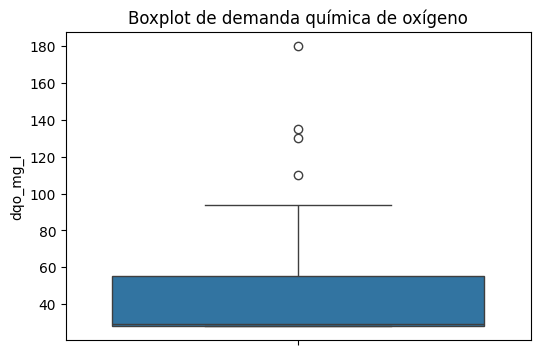

In [543]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="dqo_mg_l", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de demanda química de oxígeno')
plt.ylabel('dqo_mg_l')

# Mostrar el gráfico
plt.show()


turbiedad_ntu: Turbidez del agua medida en unidades NTU (Nephelometric Turbidity Units), que indica la claridad del agua.

Segun la OMS no debe superar las 5 NTU. Un valor elevado puede indicar contaminacion por prescencia de sediemntos en el agua.

In [544]:
preprocessed_dataset['turbiedad_ntu'].value_counts().sort_index()

turbiedad_ntu
2.500000      1
3.300000      1
4.100000      1
6.000000      1
7.500000      1
8.900000      1
9.300000      1
10.000000     1
11.000000     2
12.000000     7
13.000000     5
14.000000     2
15.000000     1
16.000000     3
17.000000     4
18.000000     4
19.000000     6
20.000000     1
21.000000     1
22.000000     3
23.000000     4
24.000000     1
25.000000     4
26.000000     5
27.000000     1
28.000000     5
29.000000     3
30.000000     4
31.000000     2
32.000000     1
33.000000     2
33.136066     5
34.000000     4
35.000000     2
36.000000     1
37.000000     3
38.000000     1
39.000000     3
45.000000     4
50.000000     3
55.000000     2
60.000000     5
65.000000     3
70.000000     2
75.000000     2
80.000000     2
85.000000     1
90.000000     3
110.000000    1
130.000000    1
Name: count, dtype: int64

A priori las muestras provienen de aguas con alto grado de turbiedad.

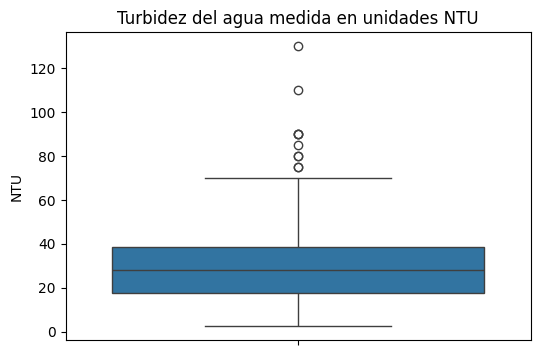

In [545]:
plt.figure(figsize=(6, 4))
sns.boxplot( y="turbiedad_ntu", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Turbidez del agua medida en unidades NTU')
plt.ylabel('NTU')

# Mostrar el gráfico
plt.show()

Los datos se concentran en valores que estan por encima del maximo recomendado por la OMS, lo cual sugiere una alta contaminacion por sedimentos.

hidr_deriv_petr_ug_l: Hidrocarburos derivados del petróleo en microgramos por litro (µg/L), que indican contaminación por productos petroleros.

In [546]:
preprocessed_dataset['hidr_deriv_petr_ug_l'].value_counts()

Series([], Name: count, dtype: int64)

Exceptuando una muestra, todas las muestras presentaron valores <=0.10 por lo que no es una variable que aporte informacion significativa al analisis.
Acomodamos los datos

In [547]:
#preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace( ' <0.10', '<10')
#preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace(' 0.10', '>=10')
#preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace(' 0.20', '>=10')

Representamos <10 con un 0, representamos >=10 con un 1

In [548]:
#preprocessed_dataset['hidr_deriv_petr_ug_l'] = (preprocessed_dataset['hidr_deriv_petr_ug_l'] == '<10').astype(int)
preprocessed_dataset['hidr_deriv_petr_ug_l'].value_counts()

Series([], Name: count, dtype: int64)

cr_total_mg_l: Concentración total de cromo en miligramos por litro (mg/L), un metal pesado que puede ser tóxico.

Según el EPA de Estados Unidos,el límite máximo de contaminantes (MCL) para el cromo total en el agua potable es de 0.1 mg/L.

No se puede sacar mucho acerca de este Atributo, no se trabajará en el.

In [549]:
preprocessed_dataset['cr_total_mg_l'].value_counts().sort_index()

cr_total_mg_l
0.005      1
0.0051     1
0.006      2
0.0061     2
0.0062     1
0.0064     1
0.0069     1
0.007      5
0.0079     1
0.008      1
0.0082     1
0.009      1
0.0095     1
0.01       1
0.011      2
0.015      1
0.02       1
12         1
6          4
7          2
8          1
<0.005    94
<5.0       1
Name: count, dtype: int64

Casi todas las muestras se encuentran muy por debajo de ese maximo, algunas casi ni registran prescencia de este metal. Ajustamos todos los valores a numéricos.

In [550]:
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<0.005', '0.004')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<5.0', '4.5')
preprocessed_dataset['cr_total_mg_l'] = pd.to_numeric(preprocessed_dataset['cr_total_mg_l'], errors='coerce')
preprocessed_dataset['cr_total_mg_l'].fillna(preprocessed_dataset['cr_total_mg_l'].mean(), inplace=True)    
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].astype(float)
preprocessed_dataset['cr_total_mg_l'].value_counts().sort_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\1127881622.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preprocessed_dataset['cr_total_mg_l'].fillna(preprocessed_dataset['cr_total_mg_l'].mean(), inplace=True)


cr_total_mg_l
0.0040     94
0.0050      1
0.0051      1
0.0060      2
0.0061      2
0.0062      1
0.0064      1
0.0069      1
0.0070      5
0.0079      1
0.0080      1
0.0082      1
0.0090      1
0.0095      1
0.0100      1
0.0110      2
0.0150      1
0.0200      1
4.5000      1
6.0000      4
7.0000      2
8.0000      1
12.0000     1
Name: count, dtype: int64

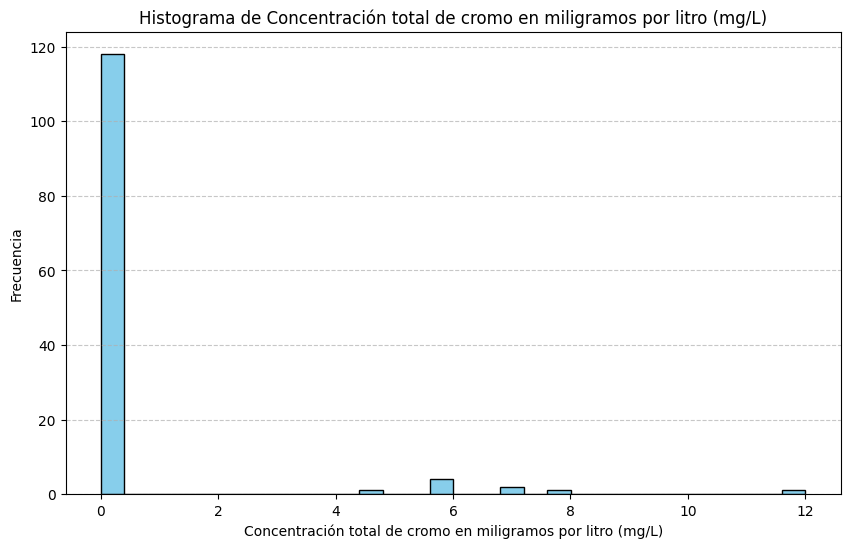

In [551]:
plt.figure(figsize=(10, 6))
plt.hist(preprocessed_dataset['cr_total_mg_l'], bins=30, color='skyblue', edgecolor='black')


plt.xlabel("Concentración total de cromo en miligramos por litro (mg/L)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Concentración total de cromo en miligramos por litro (mg/L)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

cd_total_mg_l: Concentración total de cadmio en miligramos por litro (mg/L), otro metal pesado que es tóxico en altas concentraciones.

La concentración de cadmio en el agua potable no debe exceder los 0,005 mg/L, según la FDA.

In [552]:
preprocessed_dataset['cd_total_mg_l'].value_counts().sort_index()

cd_total_mg_l
<0.001    127
Name: count, dtype: int64

En las muestras tomadas casi mo hay prescencia de este metal, por lo que su analisis no aporta informacion.

clorofila_a_ug_l: Concentración de clorofila a en microgramos por litro (µg/L), que indica la cantidad de fitoplancton en el agua.

Según la OCDE, los valores se clasifican en:

Ultraoligotróficos: < 2,5 µg Clo a/L (extremadamente pobres en nutrientes, tienen muy poca biomasa algal)

Oligotrófico: 2.5 - 8,0 µg Clo a/L (pobres en nutrientes pero tienen una mayor cantidad de biomasa algal que los ultraoligotróficos, aguas mas claras)

Mesotrófico: 8,0 - 25 µg Clo a/L ( niveles moderados de nutrientes y una cantidad moderada de biomasa algal)

Eutrófico: 25 - 75 µg Clo a/L ( ricos en nutrientes y tienen una gran cantidad de biomasa algal. Pueden experimentar floraciones algales y tener        
problemas de calidad del agua, como la disminución del oxígeno disuelto)

Hipertrófico: > 75 µg Clo a/L (extremadamente enriquecidos en nutrientes y tienen una biomasa algal muy alta. Son aguas turbias, con una baja calidad ecológica y problemas severos como la pérdida de biodiversidad y la producción de olores desagradables.)

In [553]:
preprocessed_dataset['clorofila_a_ug_l'].value_counts().sort_index()

clorofila_a_ug_l
0.0       5
0.1       1
0.2       1
0.3       3
0.4       1
0.5       1
0.6       2
0.7       1
0.8       1
1.0       1
1030      1
11.7      1
120       1
1270      1
1290      1
13.4      1
130.2     1
140.8     1
1400      1
16.7      1
164.9     1
17.0      1
17.4      1
1960      1
20.7      1
200       1
2130      1
220       1
250       1
2500      1
28        1
28.8      1
280       1
29.4      1
2900      1
3.1       1
310       1
350       2
36.5      1
40.9      1
414.8     1
42.1      1
4650      1
5.9       1
6.4       1
63.7      1
630       1
6410      1
70.8      1
720       1
740       1
760       1
77.2      1
8.2       1
8.5       1
870       1
92.4      1
930       1
<10      61
Name: count, dtype: int64

In [554]:
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('<10', '9.5')
#9.5 es un valor ínfimo comparado con otros valores.
preprocessed_dataset['clorofila_a_ug_l'] = pd.to_numeric(preprocessed_dataset['clorofila_a_ug_l'], errors='coerce')
preprocessed_dataset['clorofila_a_ug_l'].fillna(preprocessed_dataset['clorofila_a_ug_l'].mean(), inplace=True)
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].astype(float)
preprocessed_dataset['clorofila_a_ug_l'].value_counts().sort_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\1505619257.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preprocessed_dataset['clorofila_a_ug_l'].fillna(preprocessed_dataset['clorofila_a_ug_l'].mean(), inplace=True)


clorofila_a_ug_l
0.0        5
0.1        1
0.2        1
0.3        3
0.4        1
0.5        1
0.6        2
0.7        1
0.8        1
1.0        1
3.1        1
5.9        1
6.4        1
8.2        1
8.5        1
9.5       61
11.7       1
13.4       1
16.7       1
17.0       1
17.4       1
20.7       1
28.0       1
28.8       1
29.4       1
36.5       1
40.9       1
42.1       1
63.7       1
70.8       1
77.2       1
92.4       1
120.0      1
130.2      1
140.8      1
164.9      1
200.0      1
220.0      1
250.0      1
280.0      1
310.0      1
350.0      2
414.8      1
630.0      1
720.0      1
740.0      1
760.0      1
870.0      1
930.0      1
1030.0     1
1270.0     1
1290.0     1
1400.0     1
1960.0     1
2130.0     1
2500.0     1
2900.0     1
4650.0     1
6410.0     1
Name: count, dtype: int64

Los resultados estan muy dispersos, pero en general se mueven entre el 0 y 25.

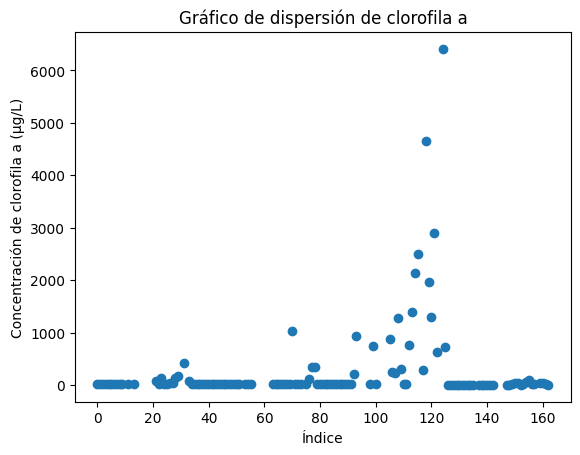

In [555]:
plt.scatter(preprocessed_dataset.index, preprocessed_dataset['clorofila_a_ug_l'])

# Personalizar el gráfico
plt.xlabel('Índice')
plt.ylabel('Concentración de clorofila a (µg/L)')
plt.title('Gráfico de dispersión de clorofila a')

# Mostrar el gráfico
plt.show()

microcistina_ug_l: Concentración de microcistinas en microgramos por litro (µg/L), que son toxinas producidas por ciertas algas.

In [556]:
preprocessed_dataset["microcistina_ug_l"].value_counts().sort_index()

microcistina_ug_l
0.19       1
0.2        1
0.3        1
0.4        1
1          2
1.67       1
<0.15     62
<0.20     26
 0.21      1
 0.23      1
 0.25      1
 0.57      1
 <0.15    28
Name: count, dtype: int64

limpiamos la columna para asi convertirla a float.

In [557]:
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.20', '0.19')  
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*<0.15\s*$', 0.14, regex=True)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*0.21\s*$', 0.21, regex=True)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*0.23\s*$', 0.23, regex=True)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*0.25\s*$', 0.25, regex=True)
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(r'^\s*0.57\s*$', 0.57, regex=True)
preprocessed_dataset['microcistina_ug_l'] = pd.to_numeric(preprocessed_dataset['microcistina_ug_l'], errors='coerce')
preprocessed_dataset["microcistina_ug_l"].fillna(preprocessed_dataset["microcistina_ug_l"].mean(), inplace=True)  
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].astype(float)
preprocessed_dataset["microcistina_ug_l"].value_counts().sort_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\207668932.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preprocessed_dataset["microcistina_ug_l"].fillna(preprocessed_dataset["microcistina_ug_l"].mean(), inplace=True)


microcistina_ug_l
0.14    90
0.19    27
0.20     1
0.21     1
0.23     1
0.25     1
0.30     1
0.40     1
0.57     1
1.00     2
1.67     1
Name: count, dtype: int64

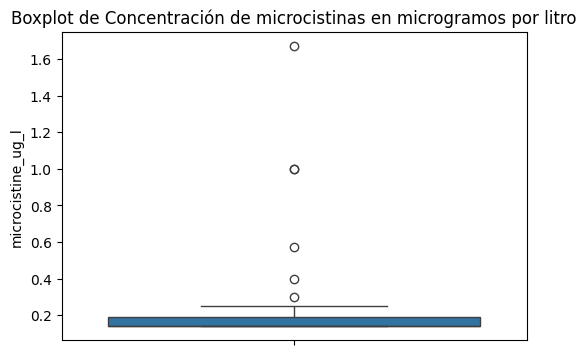

In [558]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="microcistina_ug_l", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot de Concentración de microcistinas en microgramos por litro')
plt.ylabel('microcistine_ug_l')

# Mostrar el gráfico
plt.show()

Se dejan los outliers para ver el análisis bivariado.

ICA: Índice de calidad del agua, que puede ser un valor calculado para evaluar la calidad general del agua. Atributo numérico discreto.

In [559]:
preprocessed_dataset['ica'].value_counts().sort_index()

ica
23     1
25     1
29     2
31     1
32     2
33     4
34     2
35     5
36     7
37     8
38     6
39     5
40    12
41     6
42     7
43     1
44     6
45     5
46     7
48     2
49     2
50     5
51     3
52     2
53     2
54     1
55     5
56     2
57     1
58     4
59     4
60     1
61     2
62     1
64     1
67     1
Name: count, dtype: Int64

No se ven valores a limpiar, se pasa la columna a Int.

In [560]:
preprocessed_dataset["ica"] = preprocessed_dataset["ica"].astype("Int64")

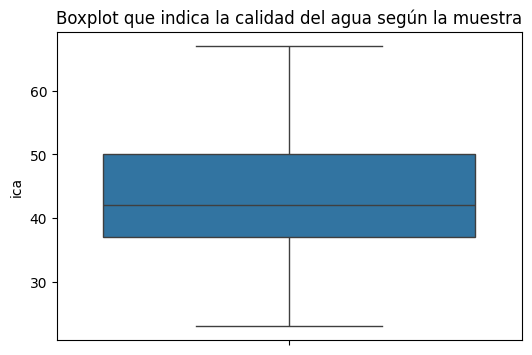

In [561]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot( y="ica", data=preprocessed_dataset)

# Añadir título y etiquetas
plt.title('Boxplot que indica la calidad del agua según la muestra')
plt.ylabel('ica')

# Mostrar el gráfico
plt.show()

El outlier no es excesivo, no se le elimina.

Nos fijamos si luego de todos los análisis quedaron filas repetidas.

In [562]:
raw_dataset.duplicated().sum()

np.int64(0)

In [563]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 0 to 162
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   sitios                                      127 non-null    object 
 1   codigo                                      127 non-null    Int64  
 2   fecha                                       127 non-null    float64
 3   campaña                                     127 non-null    object 
 4   tem_agua                                    127 non-null    float64
 5   tem_aire                                    127 non-null    float64
 6   od                                          127 non-null    float64
 7   ph                                          127 non-null    float64
 8   olores                                      127 non-null    int64  
 9   color                                       127 non-null    int64  
 10  espumas            

In [564]:
preprocessed_dataset.describe()

codigo       fecha    tem_agua    tem_aire          od          ph  \
count      127.0  127.000000  127.000000  127.000000  127.000000  127.000000   
mean   46.503937    1.519685   17.982126   15.607874    6.714583    7.570000   
std    33.119522    1.118746    4.619357    4.961496    2.844410    0.718106   
min          1.0    0.000000    6.000000    4.000000    0.360000    5.000000   
25%          8.5    1.000000   15.070000   13.000000    5.105000    7.120000   
50%         53.0    2.000000   18.200000   14.000000    6.714583    7.570000   
75%         80.0    2.500000   20.400000   17.500000    8.460000    7.935000   
max         95.0    3.000000   27.400000   27.000000   17.610000   10.020000   

           olores       color     espumas    mat_susp  ...  fosf_ortofos_mg_l  \
count  127.000000  127.000000  127.000000  127.000000  ...         127.000000   
mean     0.094488    0.094488    0.039370    0.173228  ...           0.437280   
std      0.293665    0.293665    0.195244    0.379943  ...           0.325282   
min      0.000000    0.000000    0.000000    0.000000  ...           0.100000   
25%      0.000000    0.000000    0.000000    0.000000  ...           0.245000   
50%      0.000000    0.000000    0.000000    0.000000  ...           0.350000   
75%      0.000000    0.000000    0.000000    0.000000  ...           0.525000   
max      1.000000    1.000000    1.000000    1.000000  ...           2.600000   

         dbo_mg_l   dqo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  \
count  127.000000      127.0     127.000000                   0.0   
mean     7.345455  43.874016      33.136066                   NaN   
std      4.568396  25.309197      22.969794                   NaN   
min      1.900000       28.0       2.500000                   NaN   
25%      5.200000       28.0      17.500000                   NaN   
50%      7.345455       29.0      28.000000                   NaN   
75%      7.345455       55.0      38.500000                   NaN   
max     42.000000      180.0     130.000000                   NaN   

       cr_total_mg_l  clorofila_a_ug_l  microcistina_ug_l        ica  \
count     127.000000        127.000000         127.000000      127.0   
mean        0.496649        270.431496           0.185512  43.850394   
std         1.866428        832.286889           0.176638   8.871283   
min         0.004000          0.000000           0.140000       23.0   
25%         0.004000          9.500000           0.140000       37.0   
50%         0.004000          9.500000           0.140000       42.0   
75%         0.005050         52.900000           0.190000       50.0   
max        12.000000       6410.000000           1.670000       67.0   

        es_salada  
count  127.000000  
mean     0.196850  
std      0.399193  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  

[8 rows x 26 columns]

Terminamos eliminando las dos columnas que no aportaban información

In [565]:
preprocessed_dataset = preprocessed_dataset.drop(['hidr_deriv_petr_ug_l', 'cd_total_mg_l'], axis=1)

Finalizado el análisis univariado.

ANÁLISIS BIVARIADO Y MULTIVARIADO:

Descarte de las columnas que son tipo object asi se puede realizar la matriz de correlación.

In [566]:
columas_a_excluir = ['sitios', 'campaña']
dataset_para_matriz = preprocessed_dataset.drop(columns=columas_a_excluir)
matriz_corr = dataset_para_matriz.corr()

En esta matriz tenemos un resumen completo del comportamiento bivariado de todas las variables del conjunto, según el coeficiente de correlación. Buscaremos representarlas con un mapa de calor.

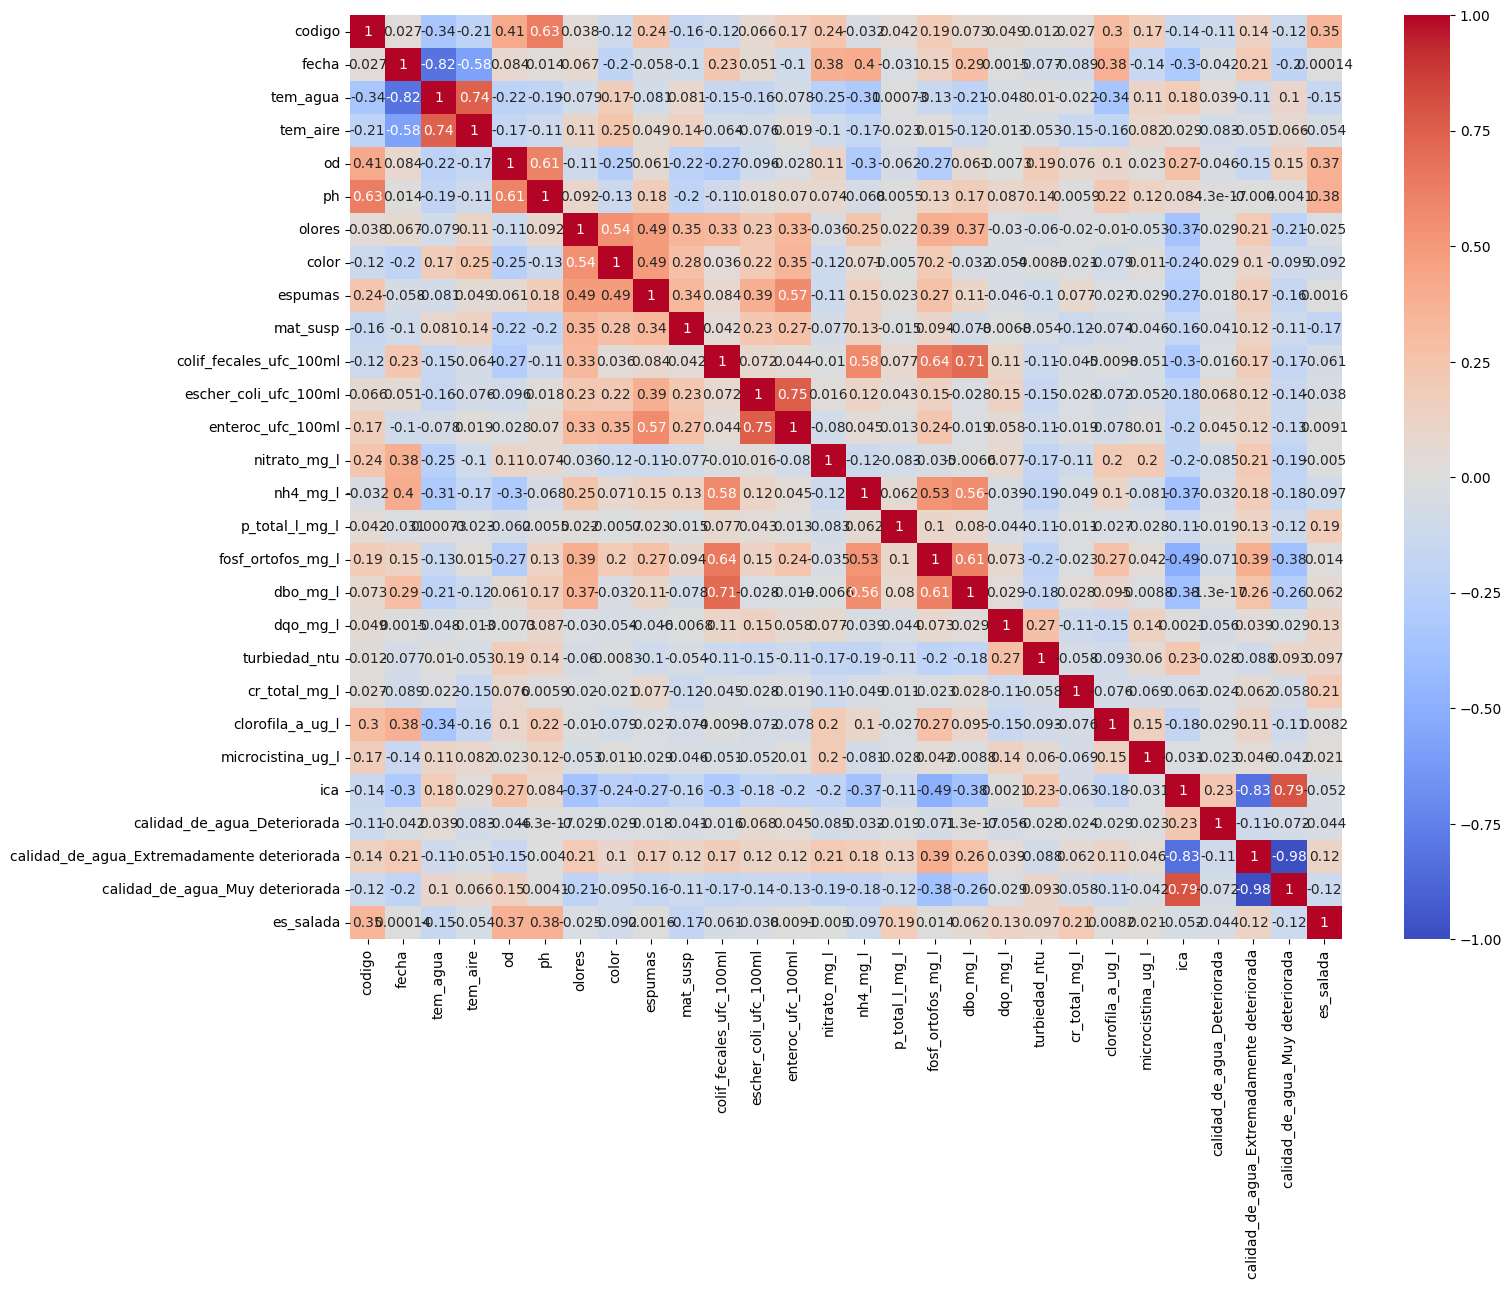

In [567]:
plt.figure(figsize=(16,12))
sns.heatmap(matriz_corr, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

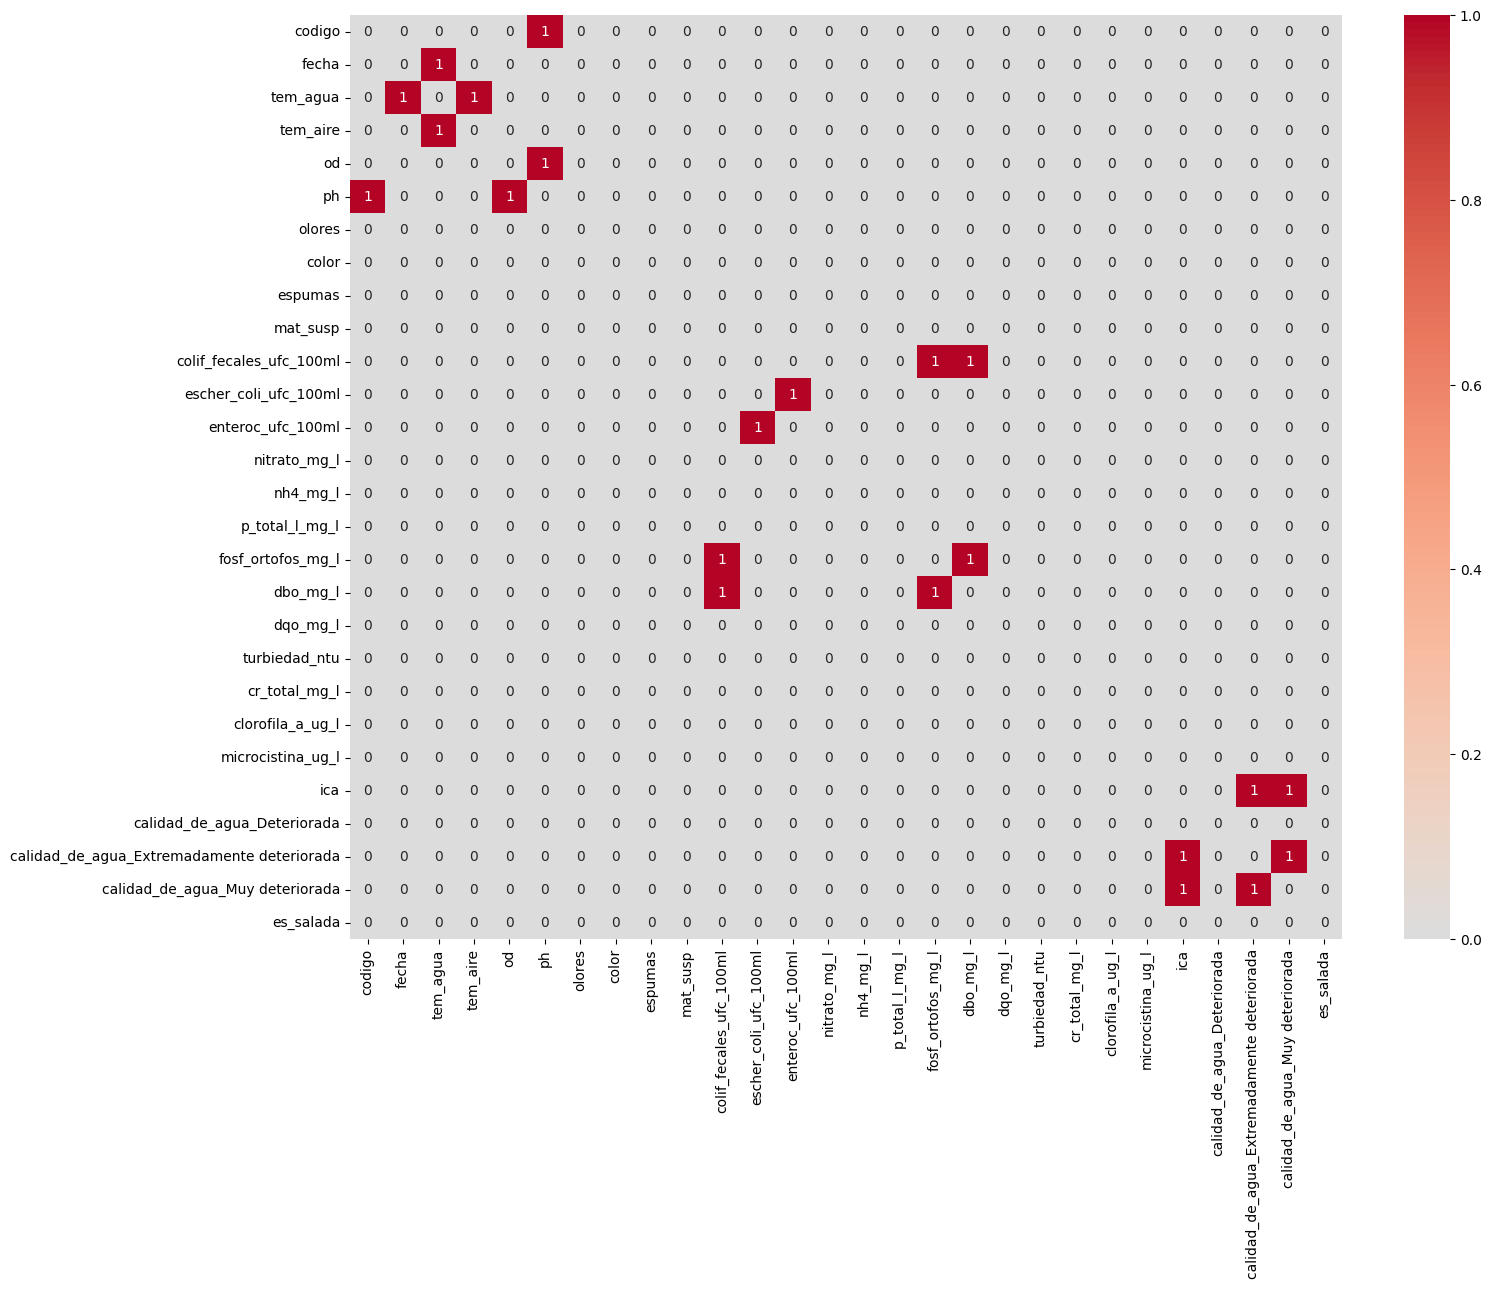

In [568]:
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.6. Partimos de un índice bajo para acaparar mas opciones.
correlation_matrix_umbralizada = matriz_corr.abs() > 0.6

# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Vemos que ninguna calidad del agua se relaciona con otra columna. Como el objetivo de la investigación es analizarla buscaremos encontrar posibles vias que la puedan explicar. Primero para seguir con lo que encontramos, realizamos scatterplot a las posibles relaciones encontradas.

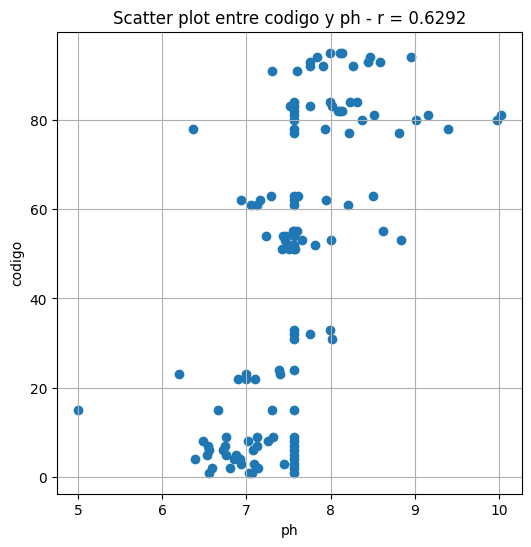

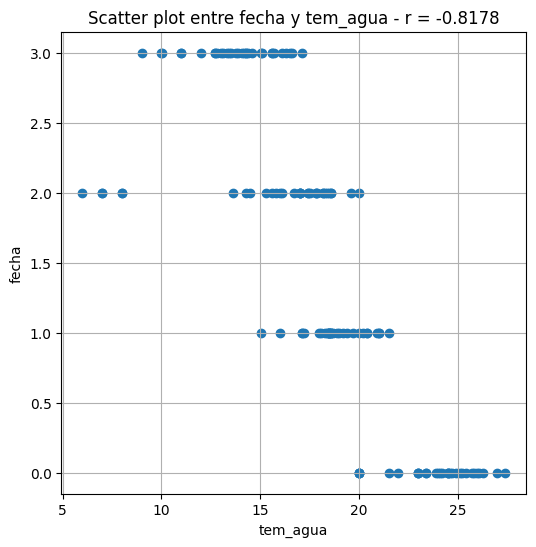

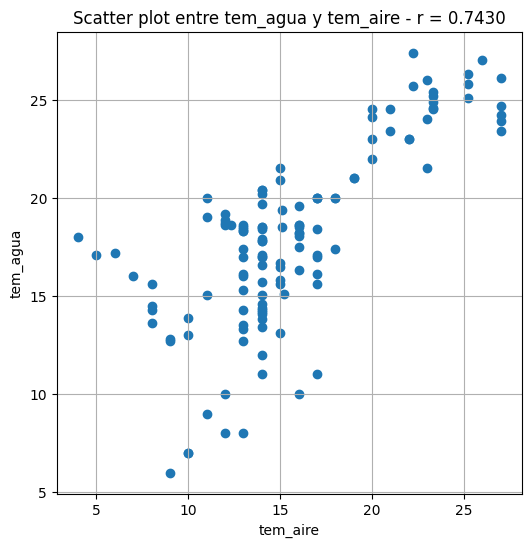

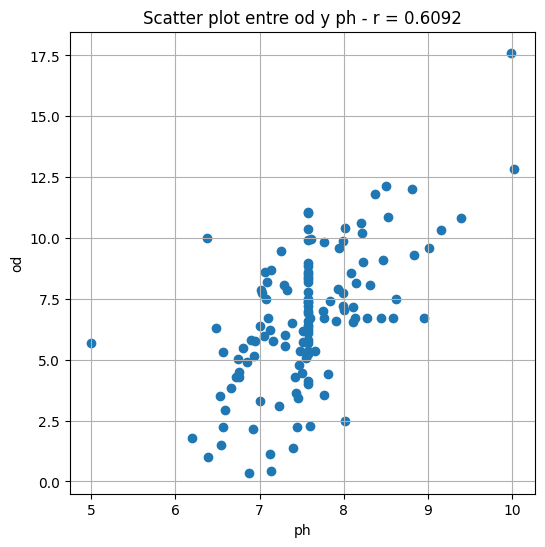

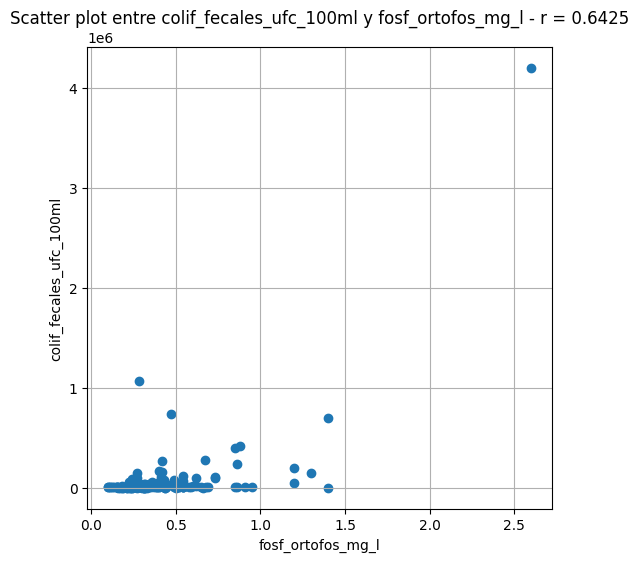

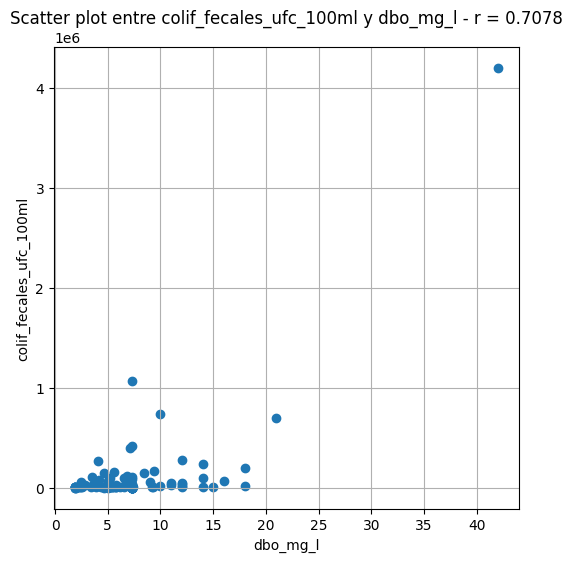

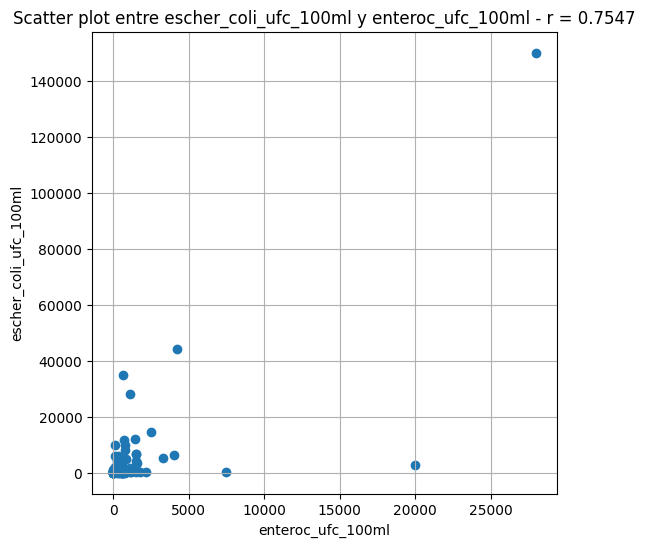

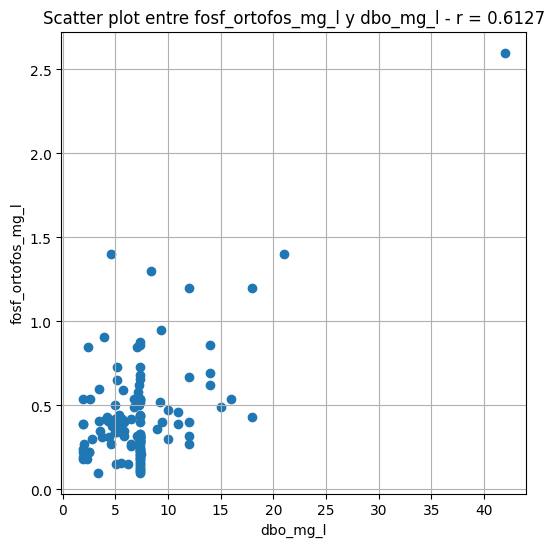

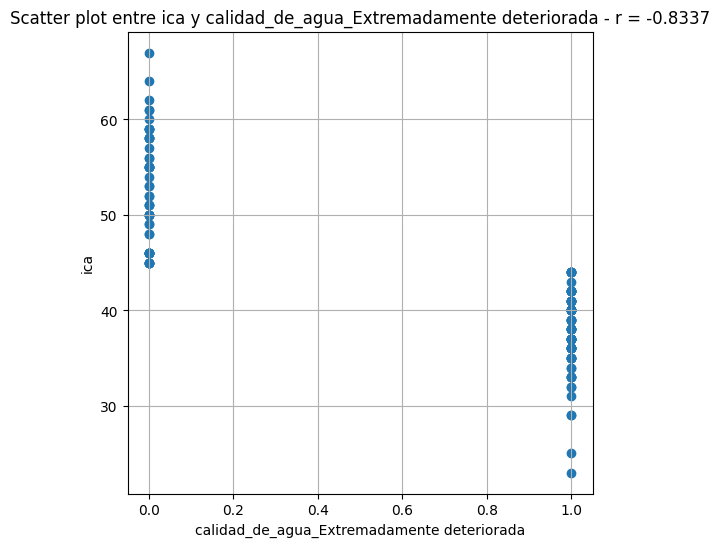

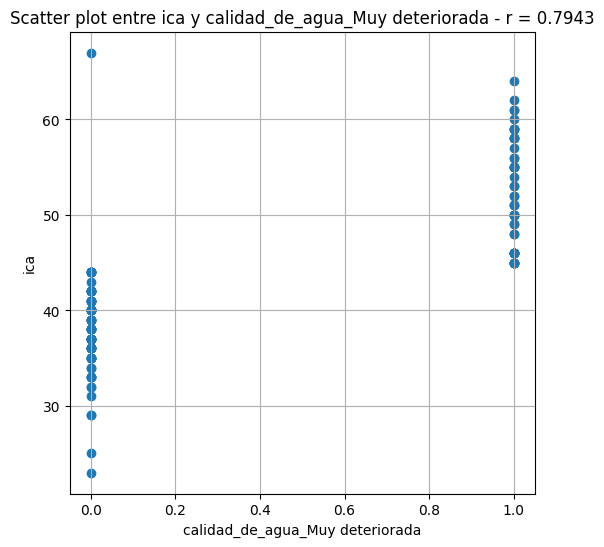

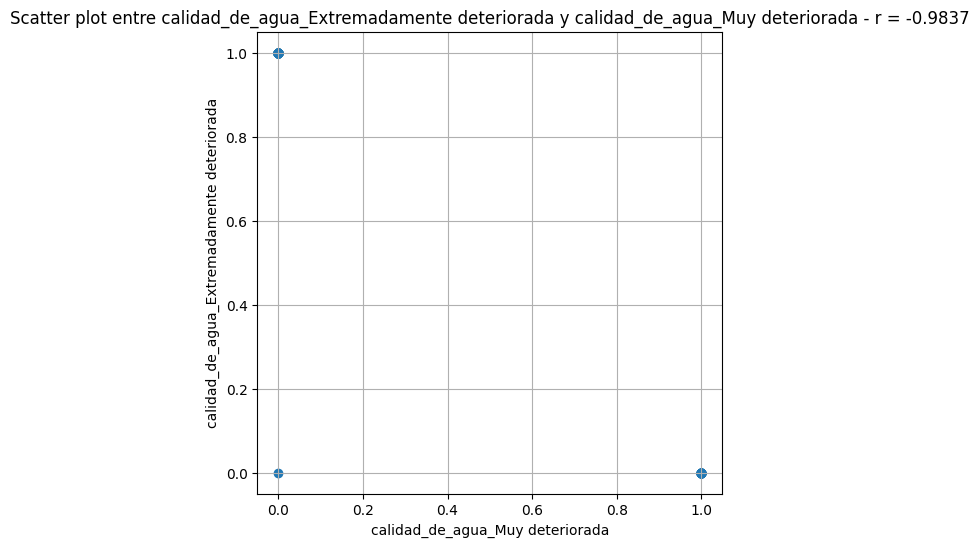

In [569]:
# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = matriz_corr.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

Empezamos a buscar relaciones en base a las relaciones vistas. La relación de PH y OD la veremos segun la calidad del agua.

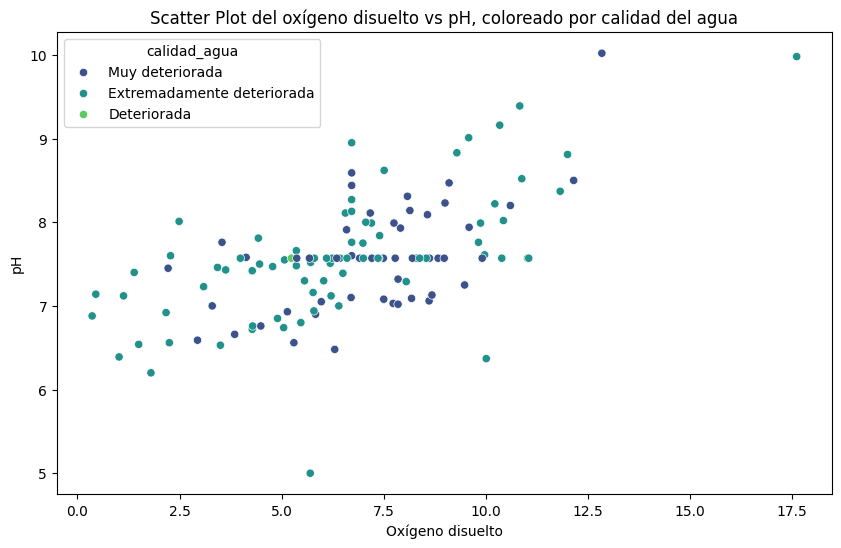

In [570]:
def calidad_agua(row):
    if row['calidad_de_agua_Extremadamente deteriorada']:
        return 'Extremadamente deteriorada'
    elif row['calidad_de_agua_Muy deteriorada']:
        return 'Muy deteriorada'
    elif row['calidad_de_agua_Deteriorada']:
        return 'Deteriorada'
    else:
        return 'Buena'

preprocessed_dataset['calidad_agua'] = preprocessed_dataset.apply(calidad_agua, axis=1)

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=preprocessed_dataset, x='od', y='ph', hue='calidad_agua', palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Oxígeno disuelto')
plt.ylabel('pH')
plt.title('Scatter Plot del oxígeno disuelto vs pH, coloreado por calidad del agua')

# Mostrar el gráfico
plt.show()

Color y olor las vemos con un índice máximo para ambas. grficamos y vemos que pasa

<Figure size 1400x800 with 0 Axes>

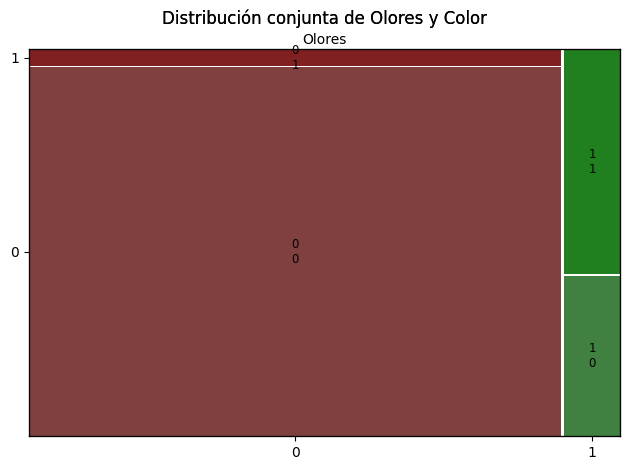

In [571]:
from statsmodels.graphics.mosaicplot import mosaic
# Crear el gráfico de mosaico
plt.figure(figsize=(14, 8))
mosaic(preprocessed_dataset, ['olores', 'color'], title='Distribución conjunta de Olores y Color')

# Añadir etiquetas y título
plt.xlabel('Olores')
plt.ylabel('Color')
plt.title('Distribución conjunta de Olores y Color')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Nos fijamos como se comportan las 4 columnas binarias.

In [572]:
# Agrupar por las columnas categóricas
grouped = preprocessed_dataset.groupby(['olores', 'color', 'espumas', 'mat_susp'])

grouped.describe()



codigo                                          \
                               count       mean        std   min   25%   50%   
olores color espumas mat_susp                                                  
0      0     0       0          96.0  51.739583  31.137469   1.0  22.0  54.0   
                     1          13.0       19.0  21.122658   1.0   5.0   7.0   
             1       0           1.0       63.0       <NA>  63.0  63.0  63.0   
       1     0       0           3.0   4.333333    3.21455   2.0   2.5   3.0   
                     1           2.0        5.5    2.12132   4.0  4.75   5.5   
1      0     0       0           2.0       40.0  53.740115   2.0  21.0  40.0   
                     1           3.0  47.666667  38.552994   4.0  33.0  62.0   
       1     0       0           3.0   5.333333   2.081666   3.0   4.5   6.0   
             1       1           4.0       91.5        7.0  81.0  91.5  95.0   

                                          fecha            ...    ica        \
                                75%   max count      mean  ...    75%   max   
olores color espumas mat_susp                              ...                
0      0     0       0         81.0  94.0  96.0  1.604167  ...   51.0  67.0   
                     1         23.0  62.0  13.0  1.153846  ...   52.0  62.0   
             1       0         63.0  63.0   1.0  1.000000  ...   36.0  36.0   
       1     0       0          5.5   8.0   3.0  0.666667  ...   45.5  46.0   
                     1         6.25   7.0   2.0  0.000000  ...  41.75  44.0   
1      0     0       0         59.0  78.0   2.0  2.500000  ...  34.25  36.0   
                     1         69.5  77.0   3.0  2.666667  ...   35.0  37.0   
       1     0       0          6.5   7.0   3.0  1.000000  ...   44.0  46.0   
             1       1         95.0  95.0   4.0  1.250000  ...  33.75  42.0   

                              es_salada                                      \
                                  count      mean       std  min   25%  50%   
olores color espumas mat_susp                                                 
0      0     0       0             96.0  0.239583  0.429070  0.0  0.00  0.0   
                     1             13.0  0.000000  0.000000  0.0  0.00  0.0   
             1       0              1.0  0.000000       NaN  0.0  0.00  0.0   
       1     0       0              3.0  0.000000  0.000000  0.0  0.00  0.0   
                     1              2.0  0.000000  0.000000  0.0  0.00  0.0   
1      0     0       0              2.0  0.500000  0.707107  0.0  0.25  0.5   
                     1              3.0  0.000000  0.000000  0.0  0.00  0.0   
       1     0       0              3.0  0.000000  0.000000  0.0  0.00  0.0   
             1       1              4.0  0.250000  0.500000  0.0  0.00  0.0   

                                          
                                75%  max  
olores color espumas mat_susp             
0      0     0       0         0.00  1.0  
                     1         0.00  0.0  
             1       0         0.00  0.0  
       1     0       0         0.00  0.0  
                     1         0.00  0.0  
1      0     0       0         0.75  1.0  
                     1         0.00  0.0  
       1     0       0         0.00  0.0  
             1       1         0.25  1.0  

[9 rows x 168 columns]

Vemos un comportamiento donde el índice ICA está sesgado a crecer en cuánto el grupo contiene menos atributos positivos

In [573]:
# Obtener estadísticas descriptivas para enteroc_ufc_100ml en cada grupo
grouped['ica'].describe()

count       mean        std   min    25%   50%  \
olores color espumas mat_susp                                                   
0      0     0       0          96.0   45.09375   8.336449  32.0  38.75  42.5   
                     1          13.0  45.230769  10.117261  32.0   37.0  41.0   
             1       0           1.0       36.0       <NA>  36.0   36.0  36.0   
       1     0       0           3.0  43.666667    3.21455  40.0   42.5  45.0   
                     1           2.0       39.5   6.363961  35.0  37.25  39.5   
1      0     0       0           2.0       32.5   4.949747  29.0  30.75  32.5   
                     1           3.0  34.333333   2.309401  33.0   33.0  33.0   
       1     0       0           3.0  37.666667  11.150486  25.0   33.5  42.0   
             1       1           4.0      31.25   7.932003  23.0   27.5  30.0   

                                 75%   max  
olores color espumas mat_susp               
0      0     0       0          51.0  67.0  
                     1          52.0  62.0  
             1       0          36.0  36.0  
       1     0       0          45.5  46.0  
                     1         41.75  44.0  
1      0     0       0         34.25  36.0  
                     1          35.0  37.0  
       1     0       0          44.0  46.0  
             1       1         33.75  42.0

HIPÓTESIS 2: ¿Las muestras, mientras menor índice de deterioro tendrán mauor número de elemenos sensibles (olor, color, mat_susp, espumas)?

Como el objetivo es saber la condición del agua para su calidad, lo que haremos será buscar clusters en base a estos y según lo que ya observamos

Para ello requeriremos a la utilización de clusters. Fijaremos los grupos según la calidad del agua.

In [574]:
data_ext_det = preprocessed_dataset[preprocessed_dataset['calidad_de_agua_Extremadamente deteriorada'] == True]
data_ext_det.head()

sitios  codigo  fecha campaña  tem_agua  \
1         Río Lujan y Arroyo Caraguatá       6    0.0  Verano      25.4   
4          Río Reconquista y Río Lujan       4    0.0  Verano      24.1   
5   Rio Tigre 100m antes del Rio Luján       5    0.0  Verano      24.9   
6       Río Lujan y Canal San Fernando       7    0.0  Verano      24.5   
13                         Perú Puente      23    0.0  Verano      26.1   

    tem_aire    od    ph  olores  color  ...  turbiedad_ntu  cr_total_mg_l  \
1       23.3  2.25  6.56       1      1  ...           34.0          0.004   
4       20.0  1.02  6.39       0      1  ...           18.0          0.004   
5       23.3  3.50  6.53       0      0  ...            8.9          0.004   
6       20.0  1.50  6.54       0      1  ...           12.0          0.004   
13      27.0  1.80  6.20       0      0  ...            7.5          0.004   

    clorofila_a_ug_l  microcistina_ug_l  ica  calidad_de_agua_Deteriorada  \
1                9.5               0.19   42                        False   
4                9.5               0.19   44                        False   
5                9.5               0.19   40                        False   
6                9.5               0.40   35                        False   
13               9.5               0.19   33                        False   

    calidad_de_agua_Extremadamente deteriorada  \
1                                         True   
4                                         True   
5                                         True   
6                                         True   
13                                        True   

    calidad_de_agua_Muy deteriorada  es_salada                calidad_agua  
1                             False          0  Extremadamente deteriorada  
4                             False          0  Extremadamente deteriorada  
5                             False          0  Extremadamente deteriorada  
6                             False          0  Extremadamente deteriorada  
13                            False          0  Extremadamente deteriorada  

[5 rows x 31 columns]

Vemos que el dataset es de muestras solo Extremadamente_deterioradas. Buscamos ahora que se normalicen los datos. Lo haremos con el Min y el Max de cada col.

In [575]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

#EXT = data_ext_det.drop(['sitios', 'fecha', 'campaña', 'calidad_de_agua_Deteriorada', 'calidad_de_agua_Extremadamente deteriorada', 'calidad_de_agua_Muy deteriorada'], axis=1)
numeric_cols = data_ext_det.select_dtypes(include=np.number).columns
# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
data_ext_det[numeric_cols] = scaler.fit_transform(data_ext_det[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
data_ext_det.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\536980560.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ext_det[numeric_cols] = scaler.fit_transform(data_ext_det[numeric_cols])


sitios    codigo  fecha campaña  tem_agua  \
1         Río Lujan y Arroyo Caraguatá  0.043011    0.0  Verano  0.896907   
4          Río Reconquista y Río Lujan  0.021505    0.0  Verano  0.829897   
5   Rio Tigre 100m antes del Rio Luján  0.032258    0.0  Verano  0.871134   
6       Río Lujan y Canal San Fernando  0.053763    0.0  Verano  0.850515   
13                         Perú Puente  0.225806    0.0  Verano  0.932990   

    tem_aire        od        ph  olores  color  ...  turbiedad_ntu  \
1   0.839130  0.109565  0.313253     1.0    1.0  ...       0.247059   
4   0.695652  0.038261  0.279116     0.0    1.0  ...       0.121569   
5   0.839130  0.182029  0.307229     0.0    0.0  ...       0.050196   
6   0.695652  0.066087  0.309237     0.0    1.0  ...       0.074510   
13  1.000000  0.083478  0.240964     0.0    0.0  ...       0.039216   

    cr_total_mg_l  clorofila_a_ug_l  microcistina_ug_l       ica  \
1             0.0          0.001482           0.032680  0.904762   
4             0.0          0.001482           0.032680  1.000000   
5             0.0          0.001482           0.032680  0.809524   
6             0.0          0.001482           0.169935  0.571429   
13            0.0          0.001482           0.032680  0.476190   

    calidad_de_agua_Deteriorada  calidad_de_agua_Extremadamente deteriorada  \
1                         False                                        True   
4                         False                                        True   
5                         False                                        True   
6                         False                                        True   
13                        False                                        True   

    calidad_de_agua_Muy deteriorada  es_salada                calidad_agua  
1                             False        0.0  Extremadamente deteriorada  
4                             False        0.0  Extremadamente deteriorada  
5                             False        0.0  Extremadamente deteriorada  
6                             False        0.0  Extremadamente deteriorada  
13                            False        0.0  Extremadamente deteriorada  

[5 rows x 31 columns]

In [576]:
columas_a_excluir = ['sitios', 'campaña', 'calidad_de_agua_Extremadamente deteriorada', 'calidad_de_agua_Deteriorada', 'calidad_de_agua_Muy deteriorada', 'calidad_agua']
dataset_para_matriz_EXT = data_ext_det.drop(columns=columas_a_excluir)
matriz_corr_ext = dataset_para_matriz_EXT.corr()

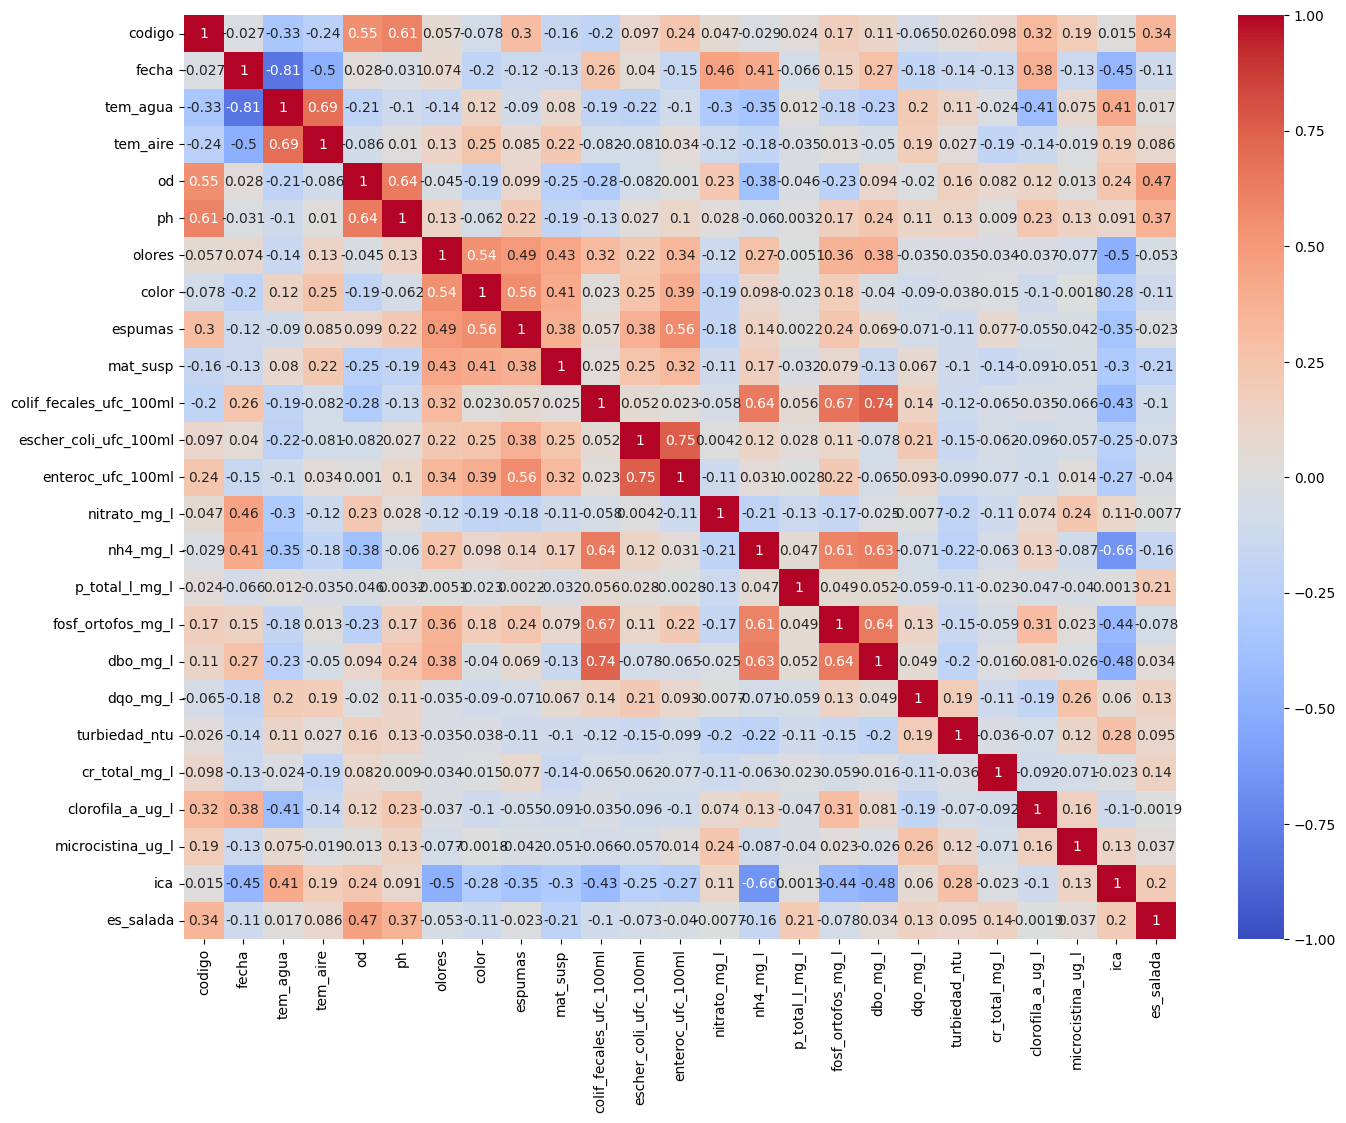

In [577]:
plt.figure(figsize=(16,12))
sns.heatmap(matriz_corr_ext, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

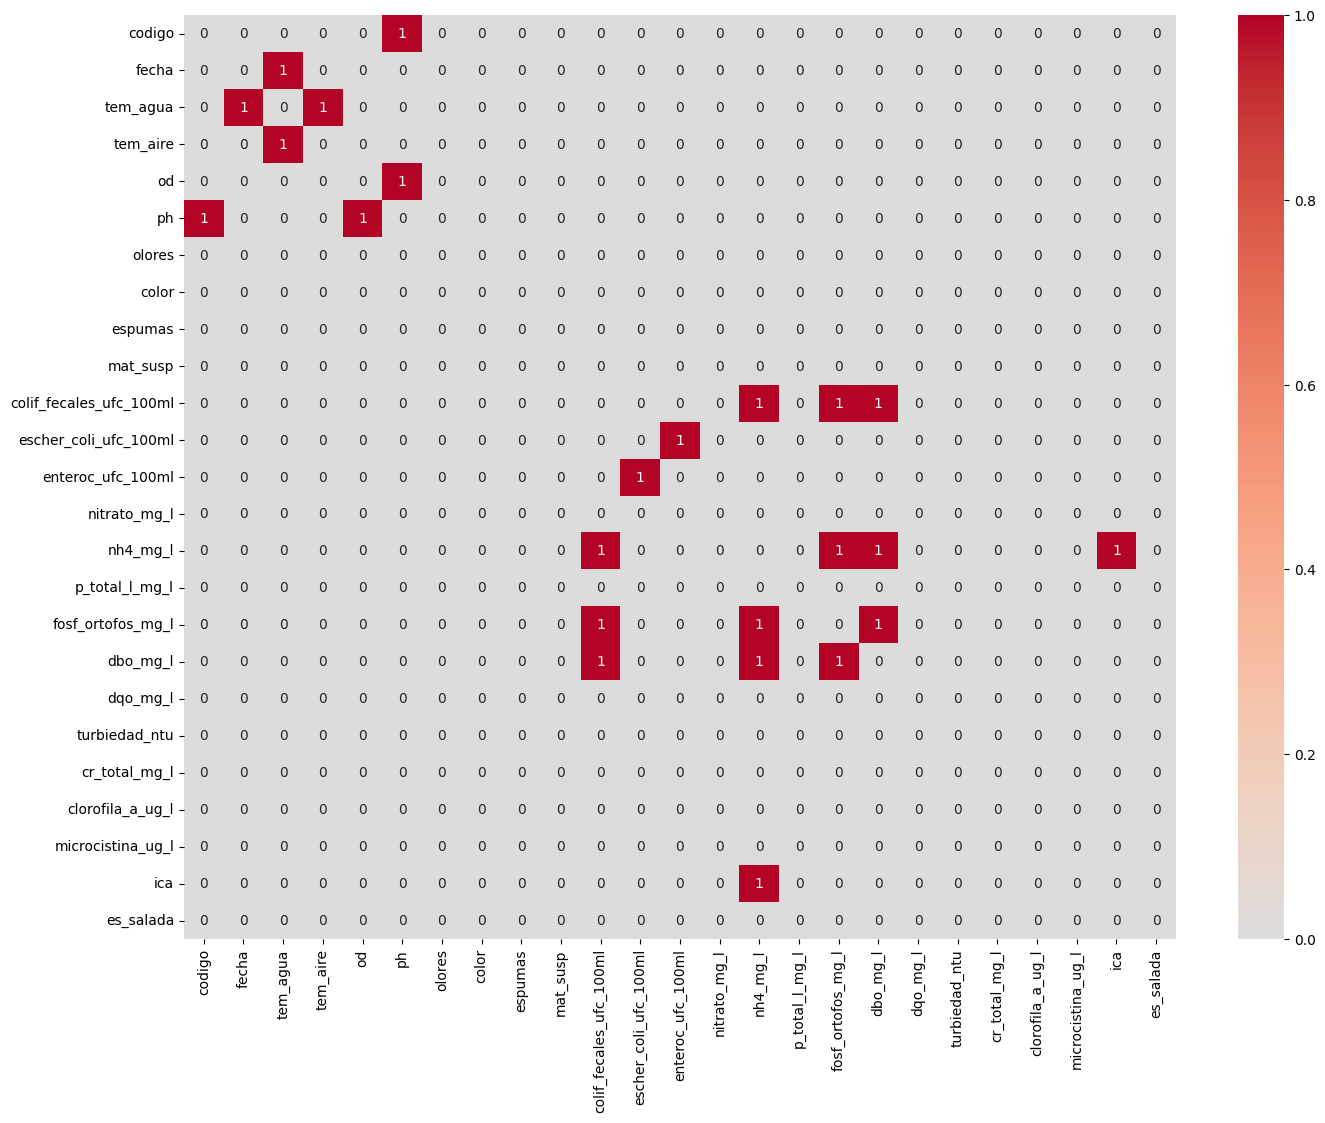

In [578]:
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.6. Partimos de un índice bajo para acaparar mas opciones.
correlation_matrix_umbral_ext = matriz_corr_ext.abs() > 0.6

# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbral_ext.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbral_ext, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

HACEMOS EL MISMO PROCESO PARA LAS MUESTRAS DETERIORADAS O MUY DETERIORADAS.

In [580]:
columas_a_excluir = ['sitios', 'campaña', 'calidad_de_agua_Extremadamente deteriorada', 'calidad_de_agua_Deteriorada', 'calidad_de_agua_Muy deteriorada', 'calidad_agua']
# Filtrar las filas con calidad_de_agua_Deteriorada = True
deteriorada_df = preprocessed_dataset[preprocessed_dataset['calidad_de_agua_Deteriorada'] == True]
deteriorada_df = preprocessed_dataset.drop(columns=columas_a_excluir)
# Filtrar las filas con calidad_de_agua_Muy deteriorada = True
muy_deteriorada_df = preprocessed_dataset[preprocessed_dataset['calidad_de_agua_Muy deteriorada'] == True]
muy_deteriorada_df = preprocessed_dataset.drop(columns=columas_a_excluir)
# Calcular las matrices de correlación
matriz_corr_deteriorada = deteriorada_df.corr()
matriz_corr_muy_deteriorada = muy_deteriorada_df.corr()

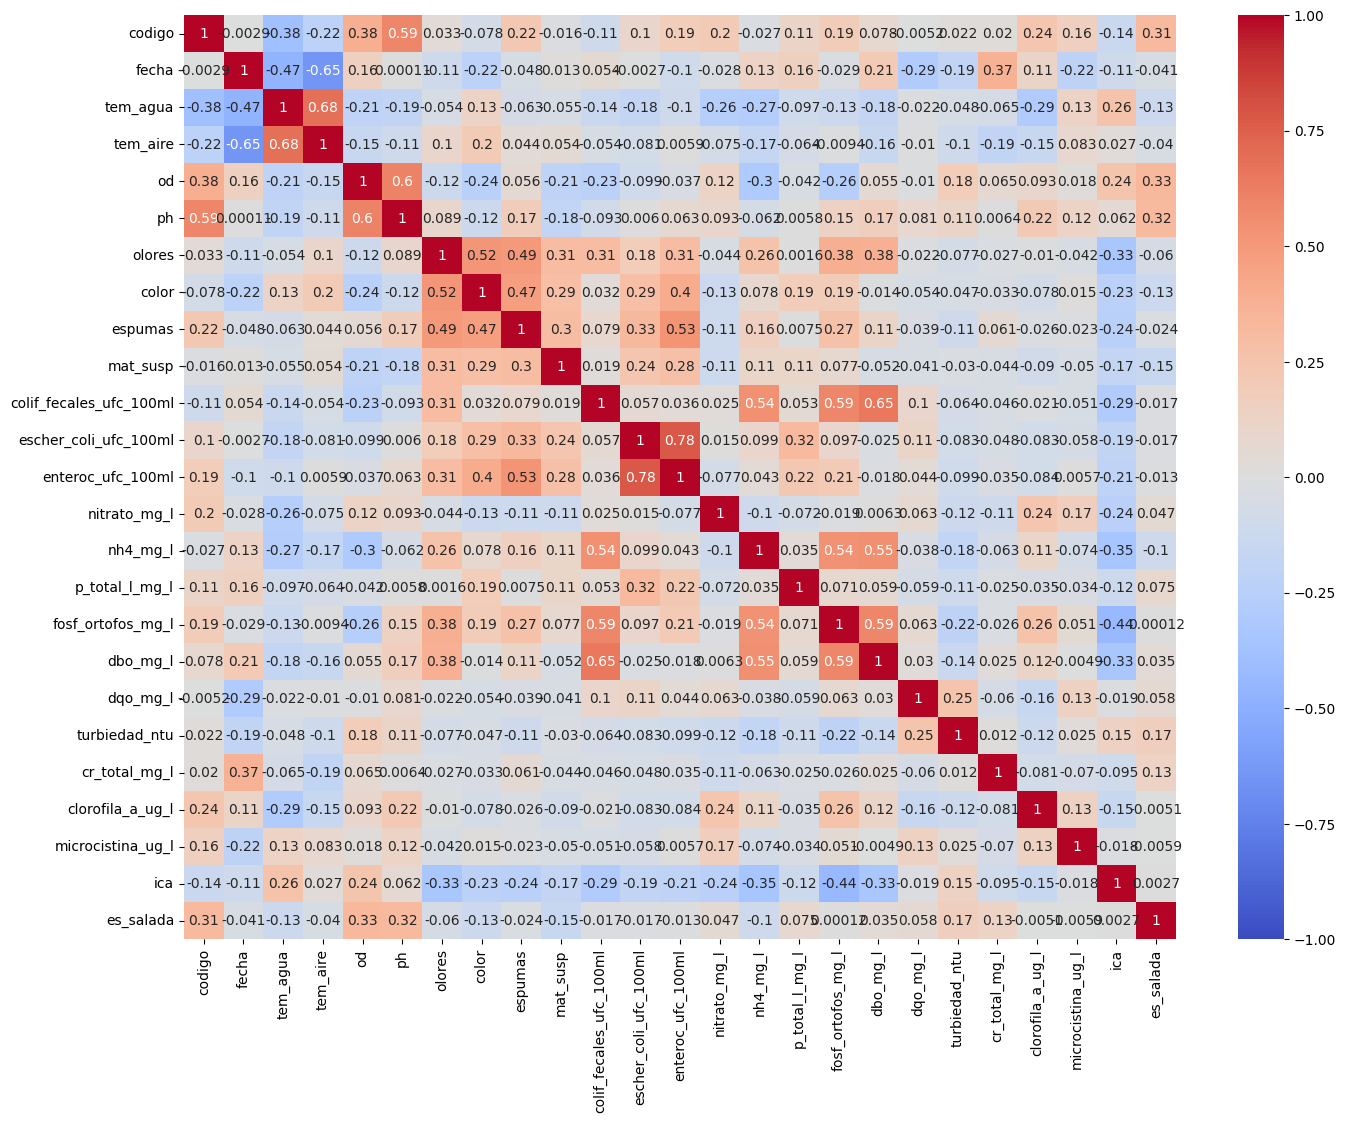

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(matriz_corr_deteriorada, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm') 
plt.show()

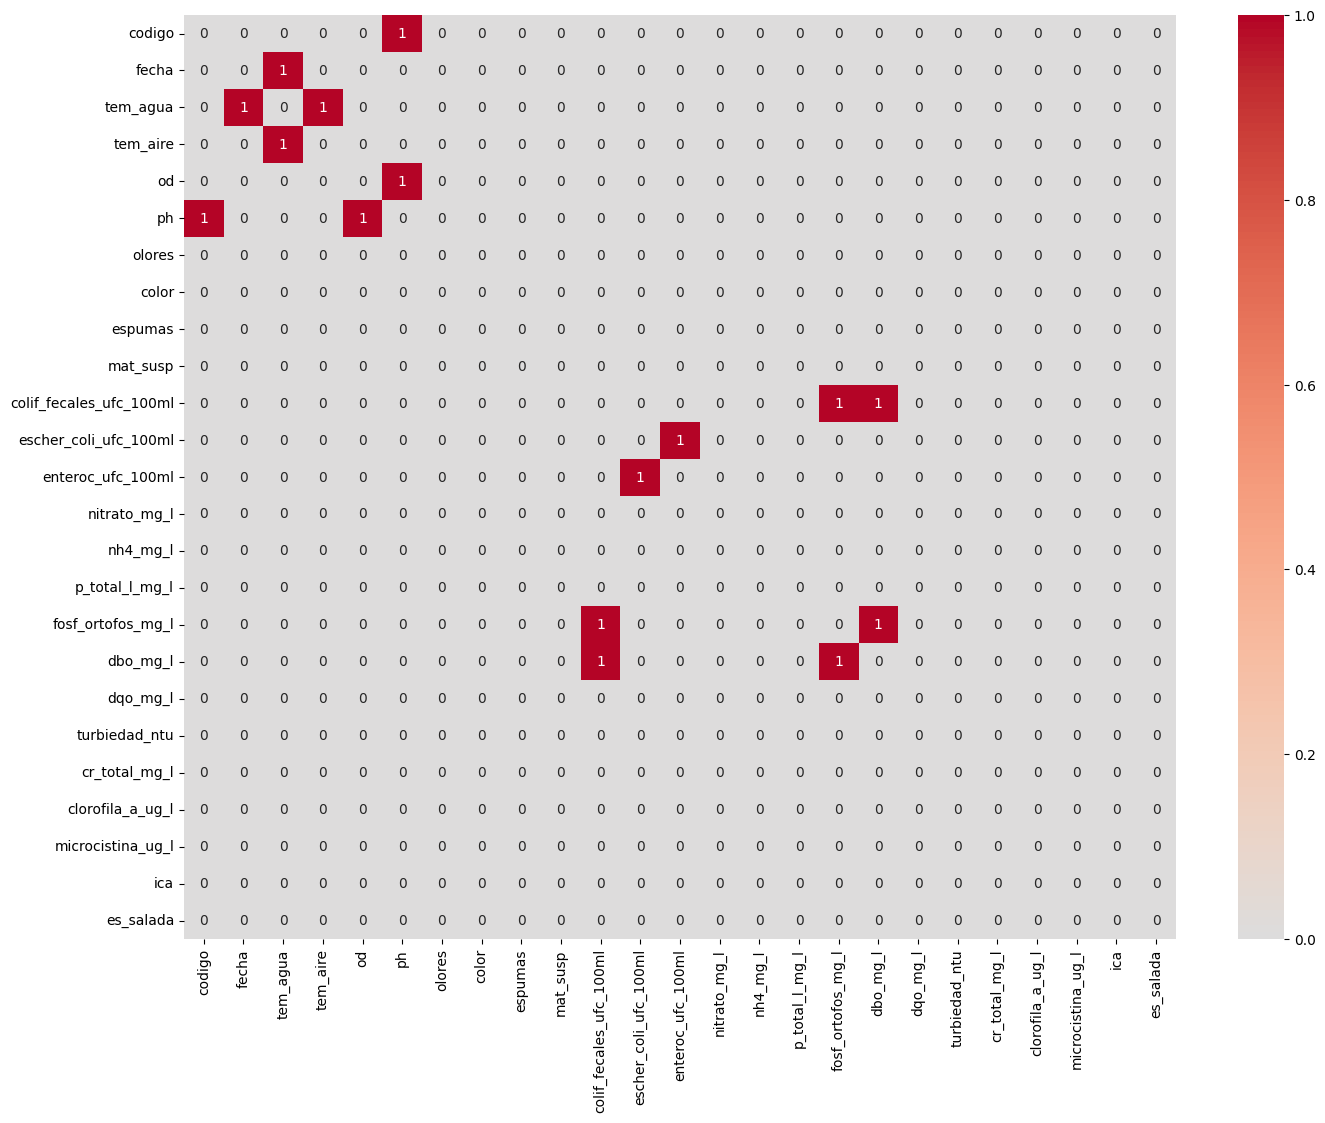

In [581]:
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.6. Partimos de un índice bajo para acaparar mas opciones.
correlation_matrix_umbral_det = matriz_corr_deteriorada.abs() > 0.6

# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbral_det.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbral_det, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

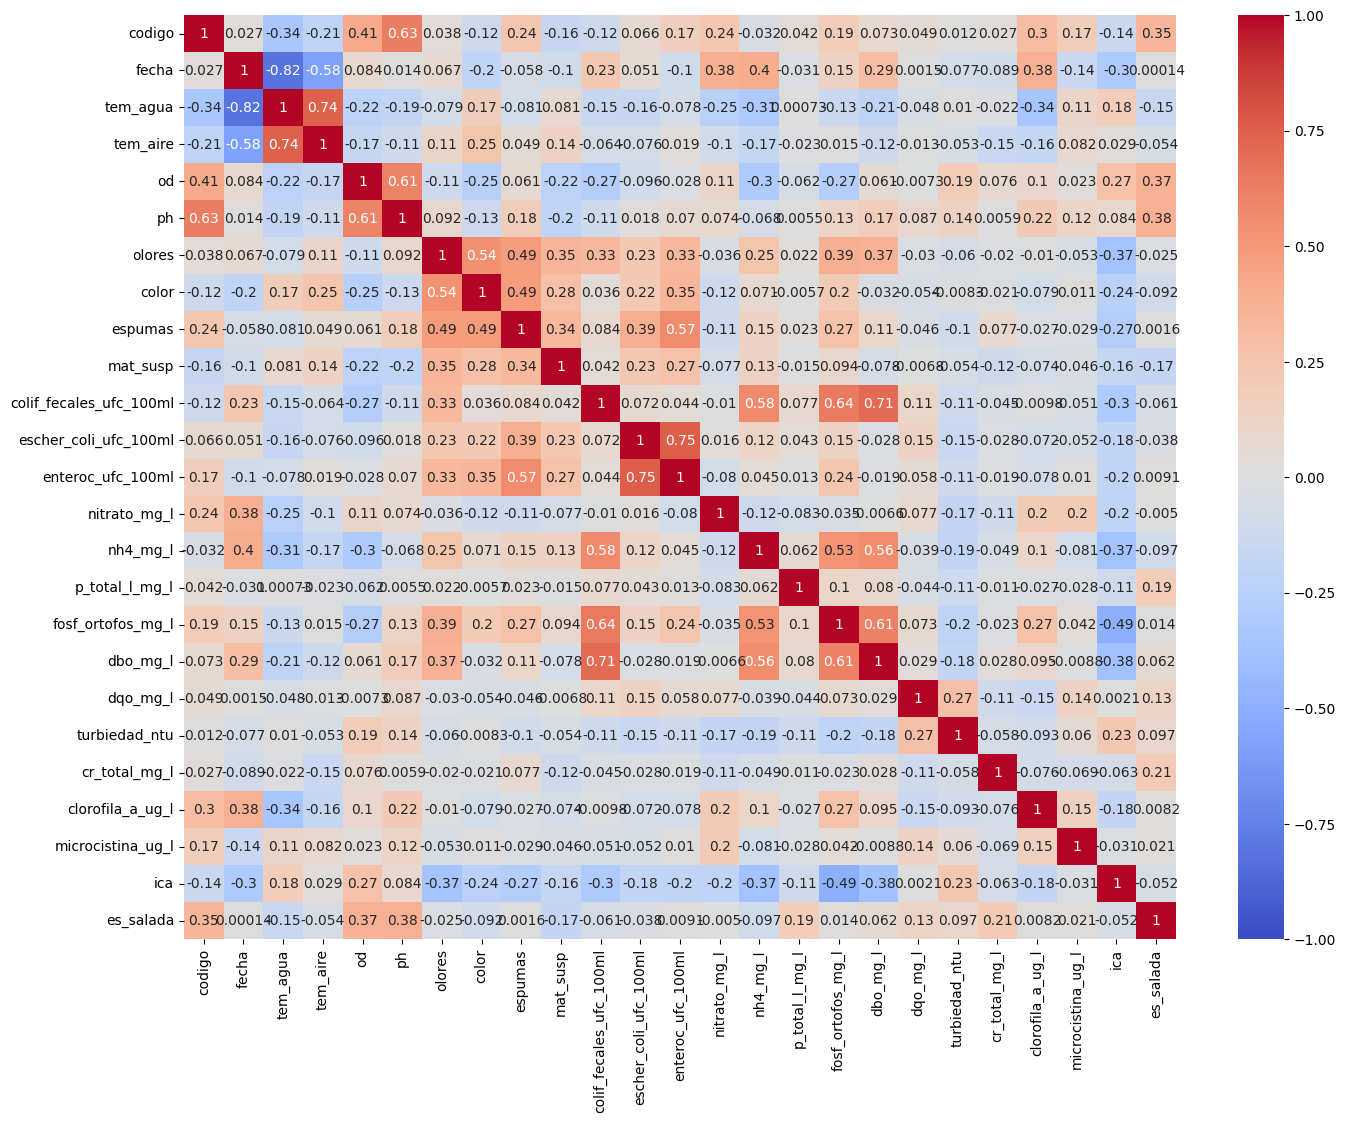

In [582]:
plt.figure(figsize=(16,12))
sns.heatmap(matriz_corr_muy_deteriorada, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

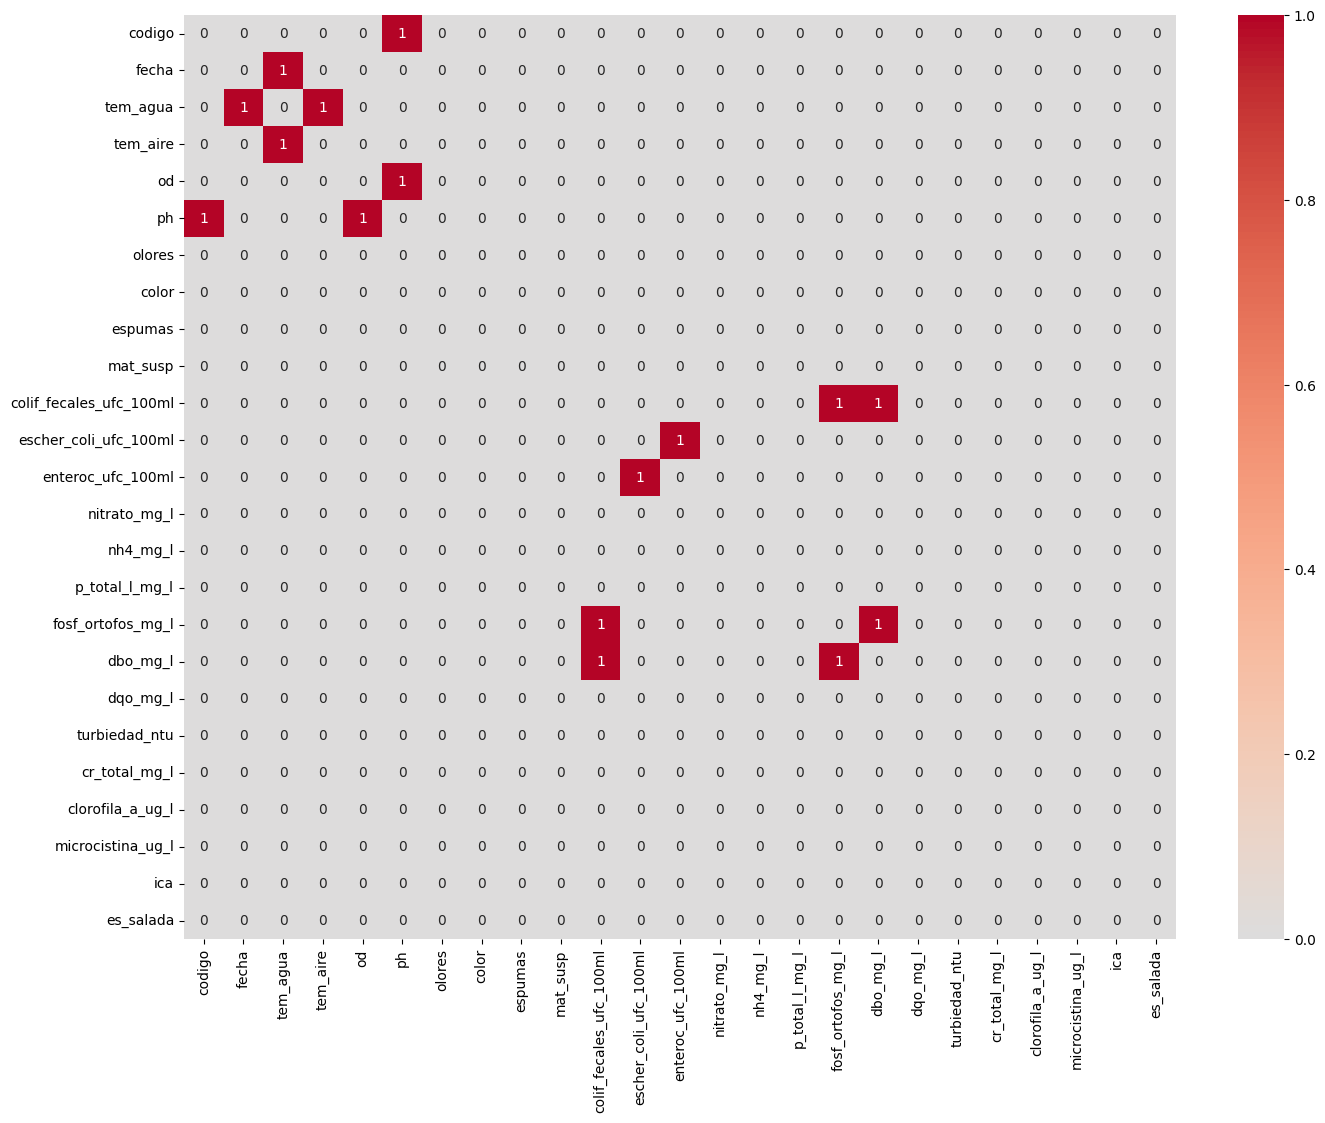

In [583]:
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.6. Partimos de un índice bajo para acaparar mas opciones.
correlation_matrix_umbral_Muy = matriz_corr_muy_deteriorada.abs() > 0.6

# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbral_Muy.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbral_Muy, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Podemos ver que si dividimos el dataset según las filas y sus respectivas calidades, a simple viste la ICA(coeficiente de calidad) solo tiene relacion con una columna y en un solo dataset. Lo graficamos igualmente
Recordamos que según los scatterplot de la primer matriz, mientras mas alto es el coeficiente, mas calidad tiene el agua.

Graficamos entonces el Nh4_mg_l segun la calidad del agua.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\929772431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=preprocessed_dataset, x='calidad_agua', y='nh4_mg_l', palette='viridis')


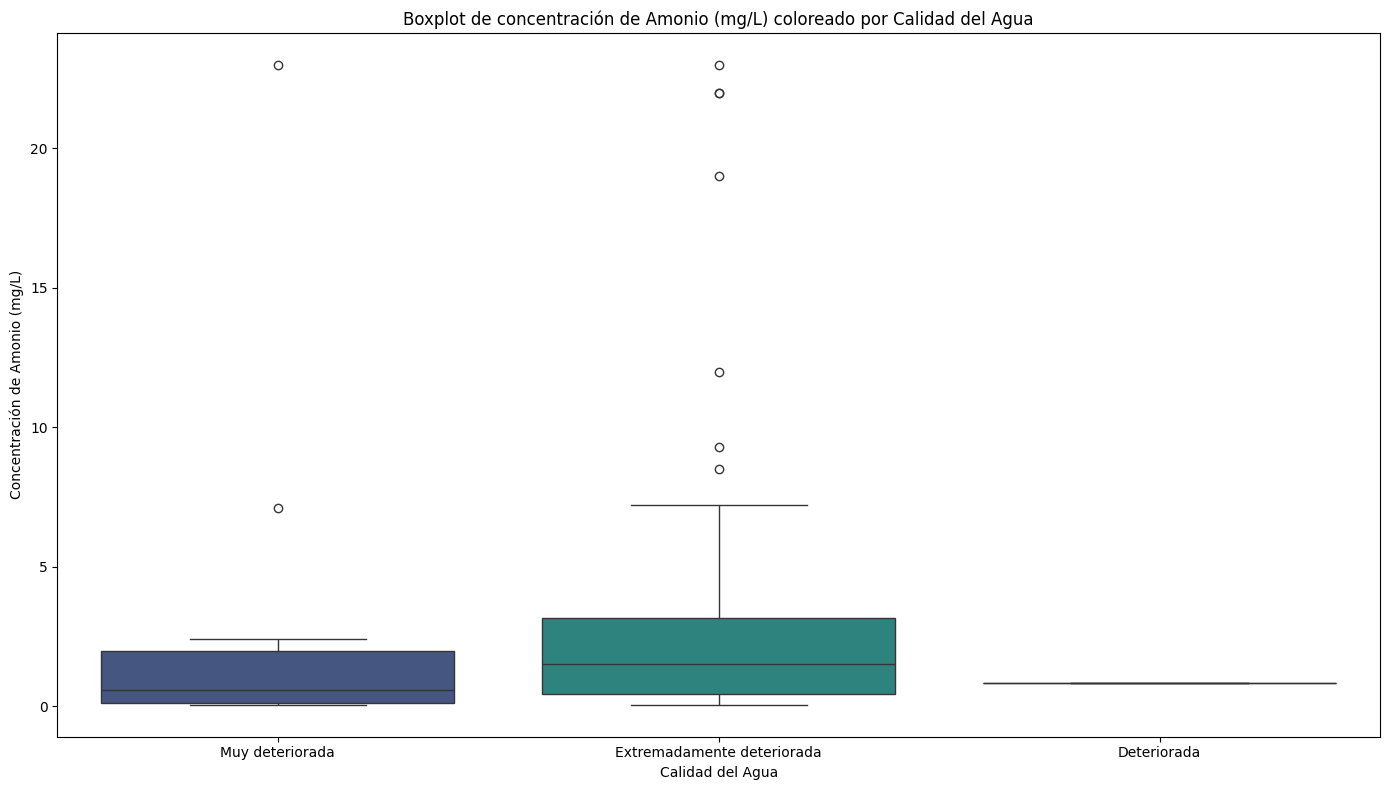

In [584]:
# Crear el boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=preprocessed_dataset, x='calidad_agua', y='nh4_mg_l', palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Calidad del Agua')
plt.ylabel('Concentración de Amonio (mg/L)')
plt.title('Boxplot de concentración de Amonio (mg/L) coloreado por Calidad del Agua')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Además queremos observar el comportamiento del atributo en las aguas extremadamente deterioradas y su relación con la calidad en las mismas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6136\3017180770.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_ext_det, x='ica', y='nh4_mg_l', palette='viridis')


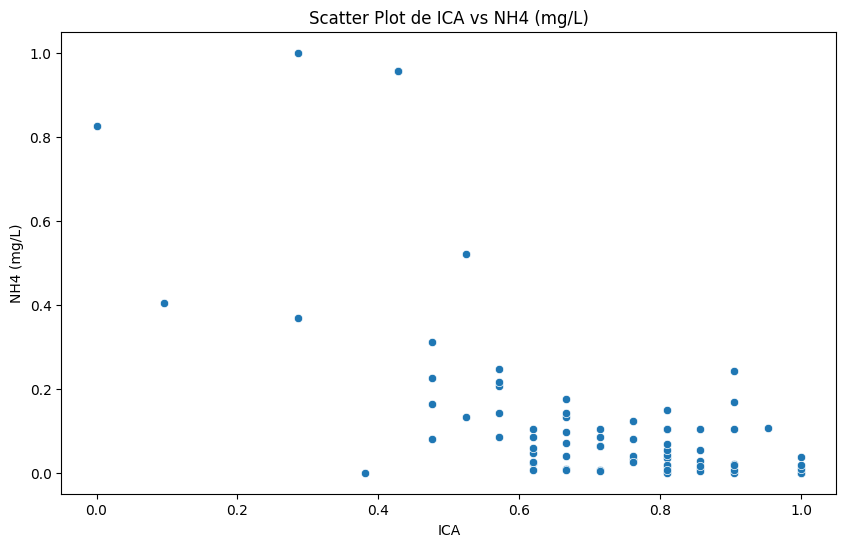

In [585]:
# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_ext_det, x='ica', y='nh4_mg_l', palette='viridis')

# Añadir etiquetas y título
plt.xlabel('ICA')
plt.ylabel('NH4 (mg/L)')
plt.title('Scatter Plot de ICA vs NH4 (mg/L)')

# Mostrar el gráfico
plt.show()

Vemos que el ICA disminuye en cuanto el amonio aumenta. Ya estamos situados en los casos de aguas mas contaminadas, por lo que ya la calidad del agua debiese tener menos variación, o indicadores del mismo en este rango. Además vimos que el Amonio aumenta segun el deterioro del agua.

HIPÓTESIS 1: ¿El aumento de la concentración de amonio en miligrmos por litro genera directamente el deterioro del agua?

Primero evualuaremos un test-t. Buscaremos normalidad en los datos.

In [586]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, aguas extremadamente deterioradas y aguas no extremadamente deterioradas
aguas_ext_contaminadas = preprocessed_dataset[preprocessed_dataset['calidad_de_agua_Extremadamente deteriorada'] == True]['nh4_mg_l']
aguas_no_ext_contaminadas = preprocessed_dataset[preprocessed_dataset['calidad_de_agua_Extremadamente deteriorada'] == False]['nh4_mg_l']

# Test de Shapiro-Wilk para aguas extremadamente deterioradas
stat, p = shapiro(aguas_ext_contaminadas)
print(f"Test de Shapiro-Wilk para países desarrollados: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para aguas no extremadamente deterioradas
stat, p = shapiro(aguas_no_ext_contaminadas)
print(f"Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para países desarrollados: Estadístico=0.587, p-valor=0.000
Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico=0.371, p-valor=0.000


Nos da que los valores no se distribuyen normalmente, debido a que el p valor es menor a 0,5. Por lo que no se podrá realizar el Test-t. Buscamos validar ahora homocedasticidad para relizar el test de Mann-Whitney U

In [588]:
import scipy.stats as stats
stat, p = stats.levene(aguas_ext_contaminadas, aguas_no_ext_contaminadas)
print(f"Test de Levene para NH4_mg_l: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para NH4_mg_l: Estadístico=3.161, p-valor=0.078


Obtenemos un p valor superior a 0,05, por lo que los datos son homocedasticos. Podemos realizar el Test de Mann-Whitney U

In [589]:
# Test de Mann-Whitney U para comparar el amonio en aguas extremadamente deterioradas y no extremadamente deterioradas
stat, p = stats.mannwhitneyu(aguas_ext_contaminadas, aguas_no_ext_contaminadas)
print(f"Test de Mann-Whitney U para NH4_MG_Amonio: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el nivel de amonio entre aguas extremadamente deterioradas y no extremadamente deterioradas.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el nivel de amonio entre aguas extremadamente deterioradas y no extremadamente deterioradas.")

Test de Mann-Whitney U para NH4_MG_Amonio: Estadístico=2568.500, p-valor=0.002
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el nivel de amonio entre aguas extremadamente deterioradas y no extremadamente deterioradas.
